In [42]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
base_path = r"C:\Users\AKANKSHA\Downloads\Dissertation Final Dataset"

In [46]:
birth_rate = pd.read_csv(f"{base_path}\\Birth rate.csv")
# Check the first few rows of the data to ensure it's structured correctly
print(birth_rate.head())

   Year  Female   Male  Total  Countries
0  1860   23262  24464  47726  Australia
1  1861   23806  25102  48908  Australia
2  1862   24896  26483  51379  Australia
3  1863   25134  26233  51367  Australia
4  1864   26838  28608  55446  Australia


In [47]:
death = pd.read_csv(f"{base_path}\\Death.csv")
print(death.head())

   Year Age   Female     Male    Total  Countries
0  1921   0  3842.31  5124.54  8966.85  Australia
1  1921   1   719.25   890.36  1609.61  Australia
2  1921   2   330.11   358.94   689.05  Australia
3  1921   3   166.06   249.66   415.72  Australia
4  1921   4   190.07   196.52   386.59  Australia


C:\Users\AKANKSHA\AppData\Local\Temp\ipykernel_12684\1230949620.py:1: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  death = pd.read_csv(f"{base_path}\\Death.csv")


In [48]:
population_size = pd.read_csv(f"{base_path}\\Population_size.csv")
print(population_size.head())

   Year Age    Female      Male      Total  Countries
0  1921   0  62847.68  65851.28  128698.96  Australia
1  1921   1   57777.3  60216.58  117993.88  Australia
2  1921   2  56940.78  59047.16  115987.94  Australia
3  1921   3  58272.29  60217.82  118490.11  Australia
4  1921   4  58718.95  60773.16  119492.11  Australia


C:\Users\AKANKSHA\AppData\Local\Temp\ipykernel_12684\742675206.py:1: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  population_size = pd.read_csv(f"{base_path}\\Population_size.csv")


In [49]:
# For simplicity, let's take the mean birth rate for each country (adjust as necessary)
avg_birth_rate = birth_rate.groupby('Countries').mean()  # Assuming the column name is 'Country'

In [51]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install nbformat


Note: you may need to restart the kernel to use updated packages.


In [53]:
# Checking the shape and unique values in the datasets
dataset_info = {
    "birth_rate": {
        "shape": birth_rate.shape,
        "unique_years": birth_rate['Year'].nunique(),
    },
    "death": {
        "shape": death.shape,
        "unique_years": death['Year'].nunique(),
    },
    "population_size": {
        "shape": population_size.shape,
        "unique_years": population_size['Year'].nunique(),
    }
}

dataset_info


{'birth_rate': {'shape': (4298, 5), 'unique_years': 274},
 'death': {'shape': (412920, 6), 'unique_years': 272},
 'population_size': {'shape': (420471, 6), 'unique_years': 331}}

Life Expectancy Estimation for All Countries

C:\Users\AKANKSHA\AppData\Local\Temp\ipykernel_12684\2709693609.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=birth_death_all, x="Year", y="death_to_birth_ratio", hue="Countries", ci=None)
c:\Users\AKANKSHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AKANKSHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AKANKSHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and wil

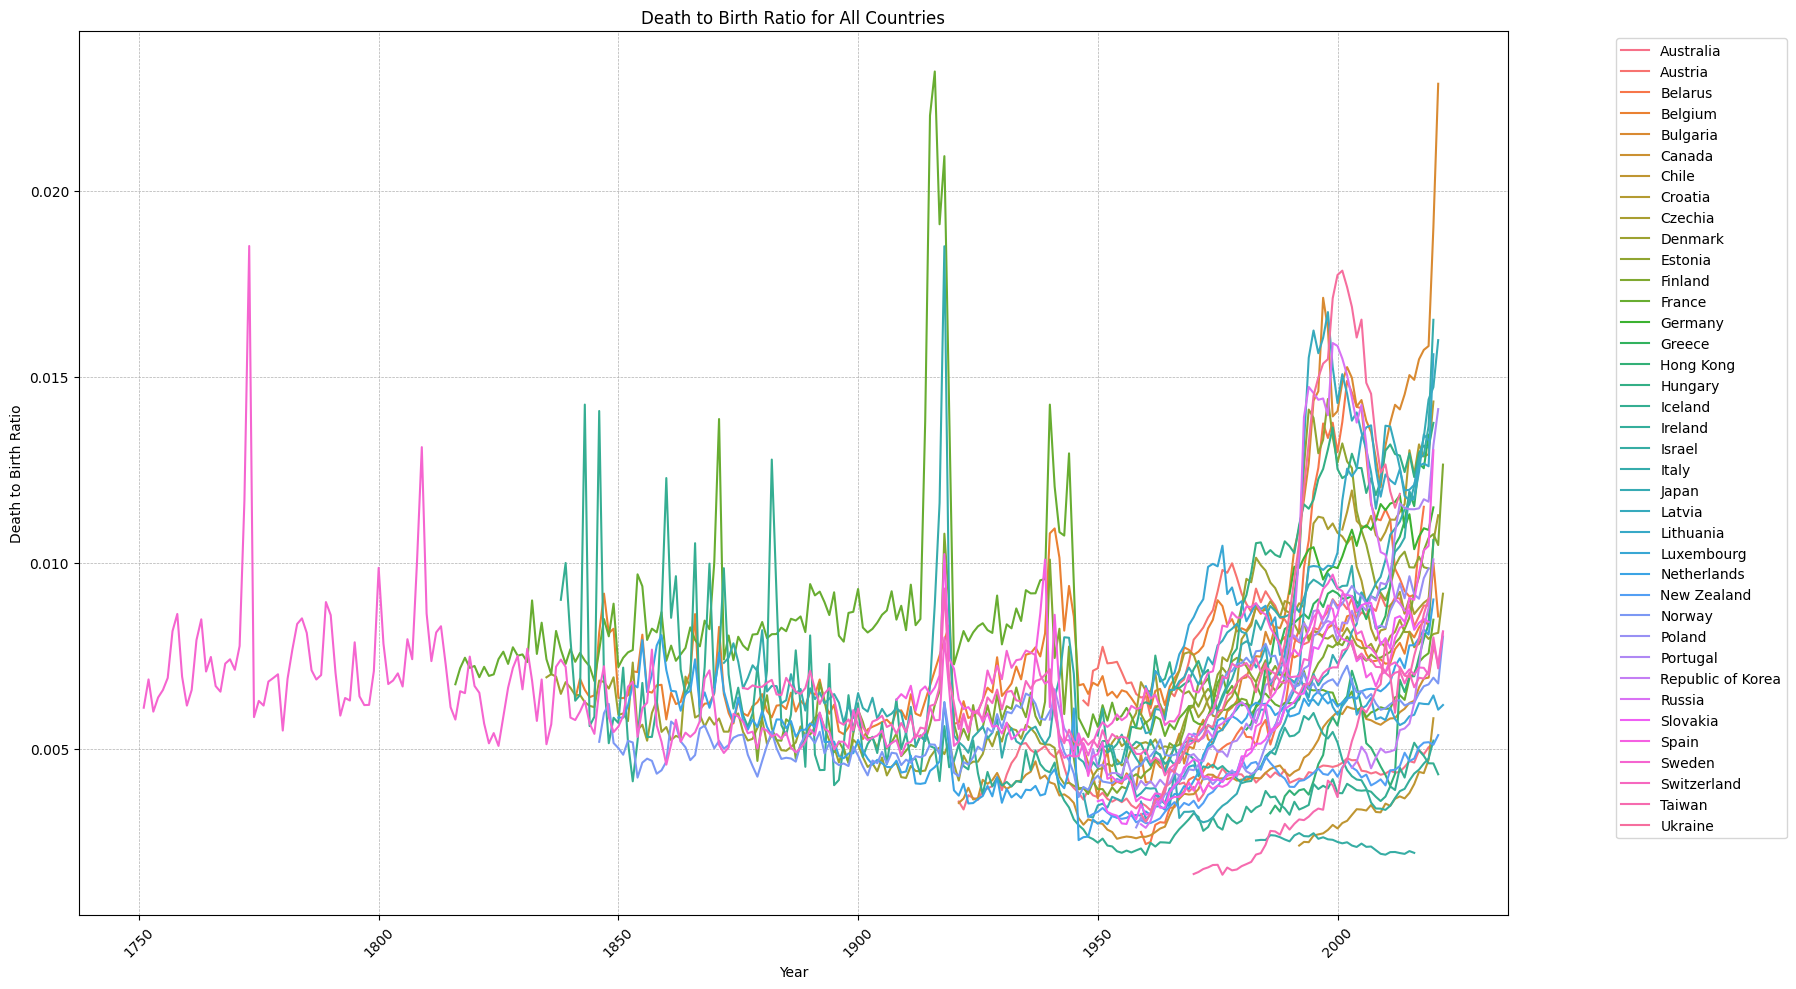

In [54]:
# Merge birth_rate and death datasets on Year and Country
birth_death_all = pd.merge(birth_rate, death, how="inner", left_on=["Year", "Countries"], right_on=["Year", "Countries"])

# Convert "Total" columns to numeric
birth_death_all["Total_x"] = pd.to_numeric(birth_death_all["Total_x"], errors='coerce')
birth_death_all["Total_y"] = pd.to_numeric(birth_death_all["Total_y"], errors='coerce')

# Re-calculate the death to birth ratio for all countries
birth_death_all["death_to_birth_ratio"] = birth_death_all["Total_y"] / birth_death_all["Total_x"]

# Plot with legend
plt.figure(figsize=(18, 10))
sns.lineplot(data=birth_death_all, x="Year", y="death_to_birth_ratio", hue="Countries", ci=None)
plt.title("Death to Birth Ratio for All Countries")
plt.ylabel("Death to Birth Ratio")
plt.xlabel("Year")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), ncol=1)
plt.xticks(rotation=45)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

Highest and Lowest Life Expectancy Estimation for Countries

C:\Users\AKANKSHA\AppData\Local\Temp\ipykernel_12684\4182415719.py:2: DtypeWarning: Columns (2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  life_table_total = pd.read_csv(f"{base_path}\\Life_table_total.csv")
C:\Users\AKANKSHA\AppData\Local\Temp\ipykernel_12684\4182415719.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=focus_data, x="Year", y="death_to_birth_ratio", hue="Countries", ci=None)
c:\Users\AKANKSHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AKANKSHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use i

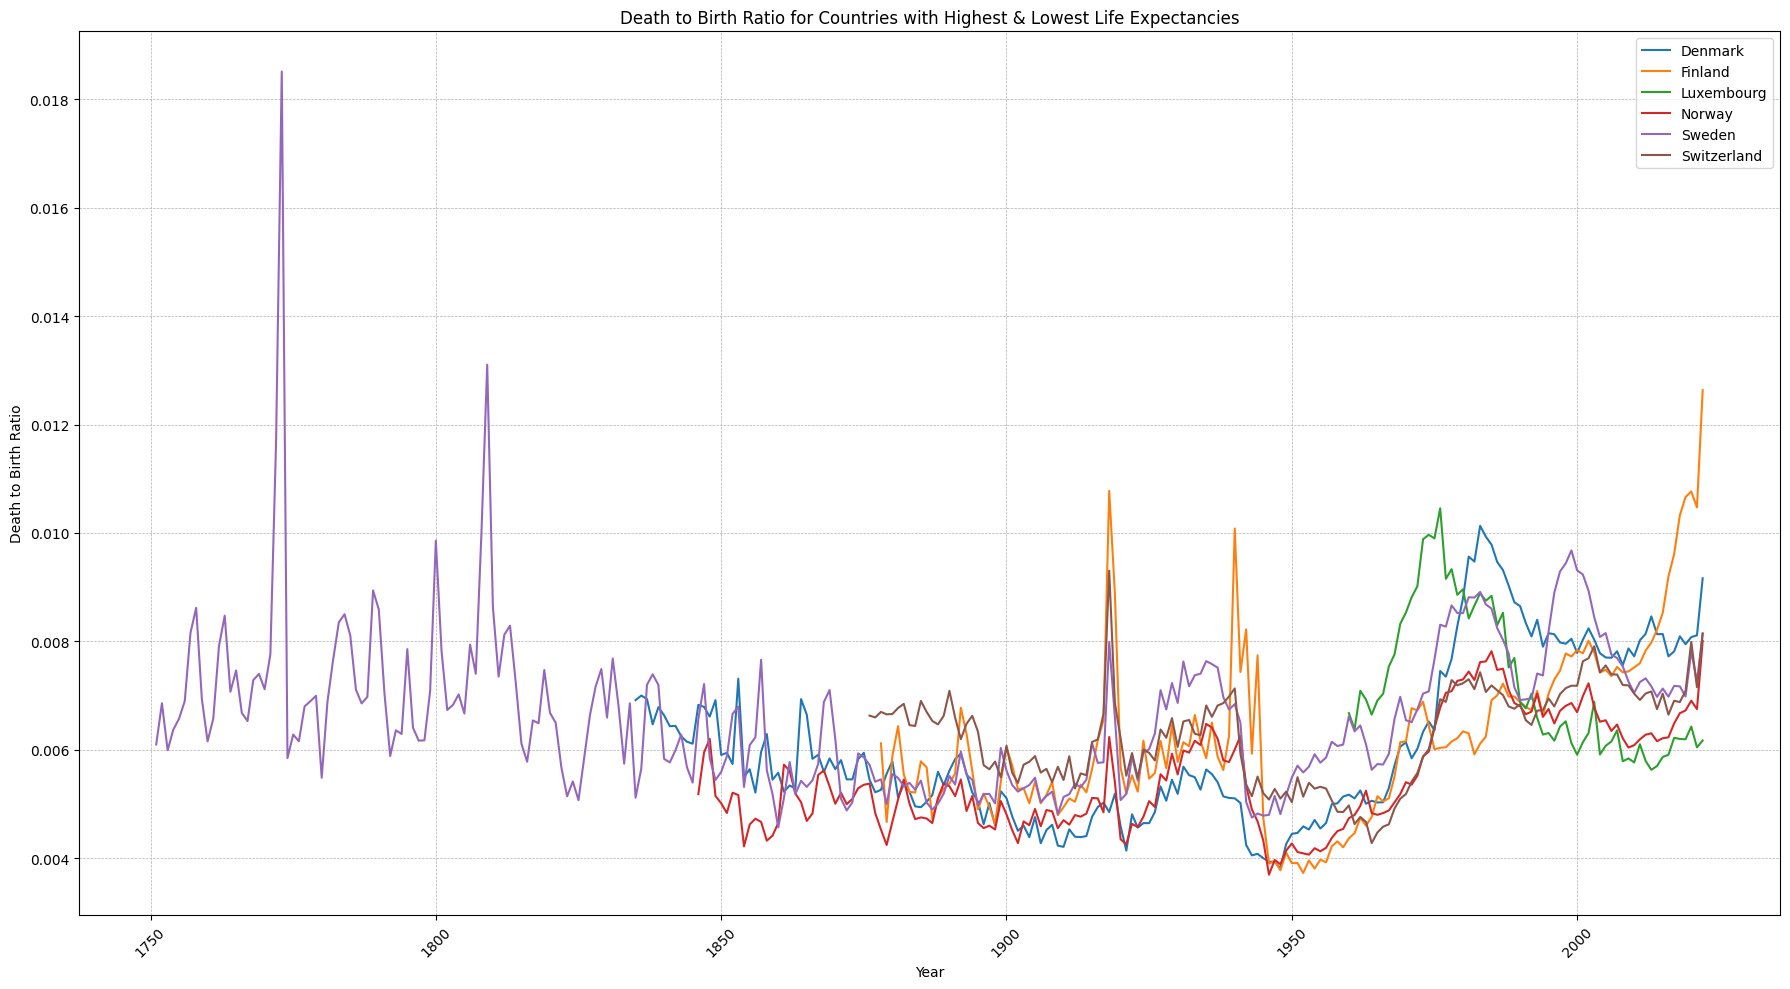

In [55]:
# Load the life_table_total dataset
life_table_total = pd.read_csv(f"{base_path}\\Life_table_total.csv")

# Merge birth_rate and death datasets on Year and Country
birth_death_all = pd.merge(birth_rate, death, how="inner", left_on=["Year", "Countries"], right_on=["Year", "Countries"])

# Convert "Total" columns to numeric
birth_death_all["Total_x"] = pd.to_numeric(birth_death_all["Total_x"], errors='coerce')
birth_death_all["Total_y"] = pd.to_numeric(birth_death_all["Total_y"], errors='coerce')

# Calculate the death-to-birth ratio
birth_death_all["death_to_birth_ratio"] = birth_death_all["Total_y"] / birth_death_all["Total_x"]

# Extract countries with the highest and lowest life expectancies for the latest year from life_table_total
latest_year = life_table_total["Year"].max()
latest_life_expectancy = life_table_total[(life_table_total["Year"] == latest_year) & (life_table_total["Age"] == "0")]

# Identify countries with top 3 highest and lowest life expectancies
lowest_countries = latest_life_expectancy.sort_values(by="ex", ascending=True).head(3)
highest_countries = latest_life_expectancy.sort_values(by="ex", ascending=False).head(3)

# Concatenate the dataframes
focus_countries_df = pd.concat([lowest_countries, highest_countries])
focus_countries = focus_countries_df["Countries"].tolist()

# Filter birth_death_all dataset for these countries
focus_data = birth_death_all[birth_death_all["Countries"].isin(focus_countries)]

# Plot
plt.figure(figsize=(18, 10))
sns.lineplot(data=focus_data, x="Year", y="death_to_birth_ratio", hue="Countries", ci=None)
plt.title("Death to Birth Ratio for Countries with Highest & Lowest Life Expectancies")
plt.ylabel("Death to Birth Ratio")
plt.xlabel("Year")
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


***Population Growth Rate***

C:\Users\AKANKSHA\AppData\Local\Temp\ipykernel_12684\3075449699.py:2: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  population_size = pd.read_csv(f"{base_path}\\Population_size.csv")
C:\Users\AKANKSHA\AppData\Local\Temp\ipykernel_12684\3075449699.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=population_size, x="Year", y="Growth_Rate", hue="Countries", ci=None)
c:\Users\AKANKSHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AKANKSHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype,

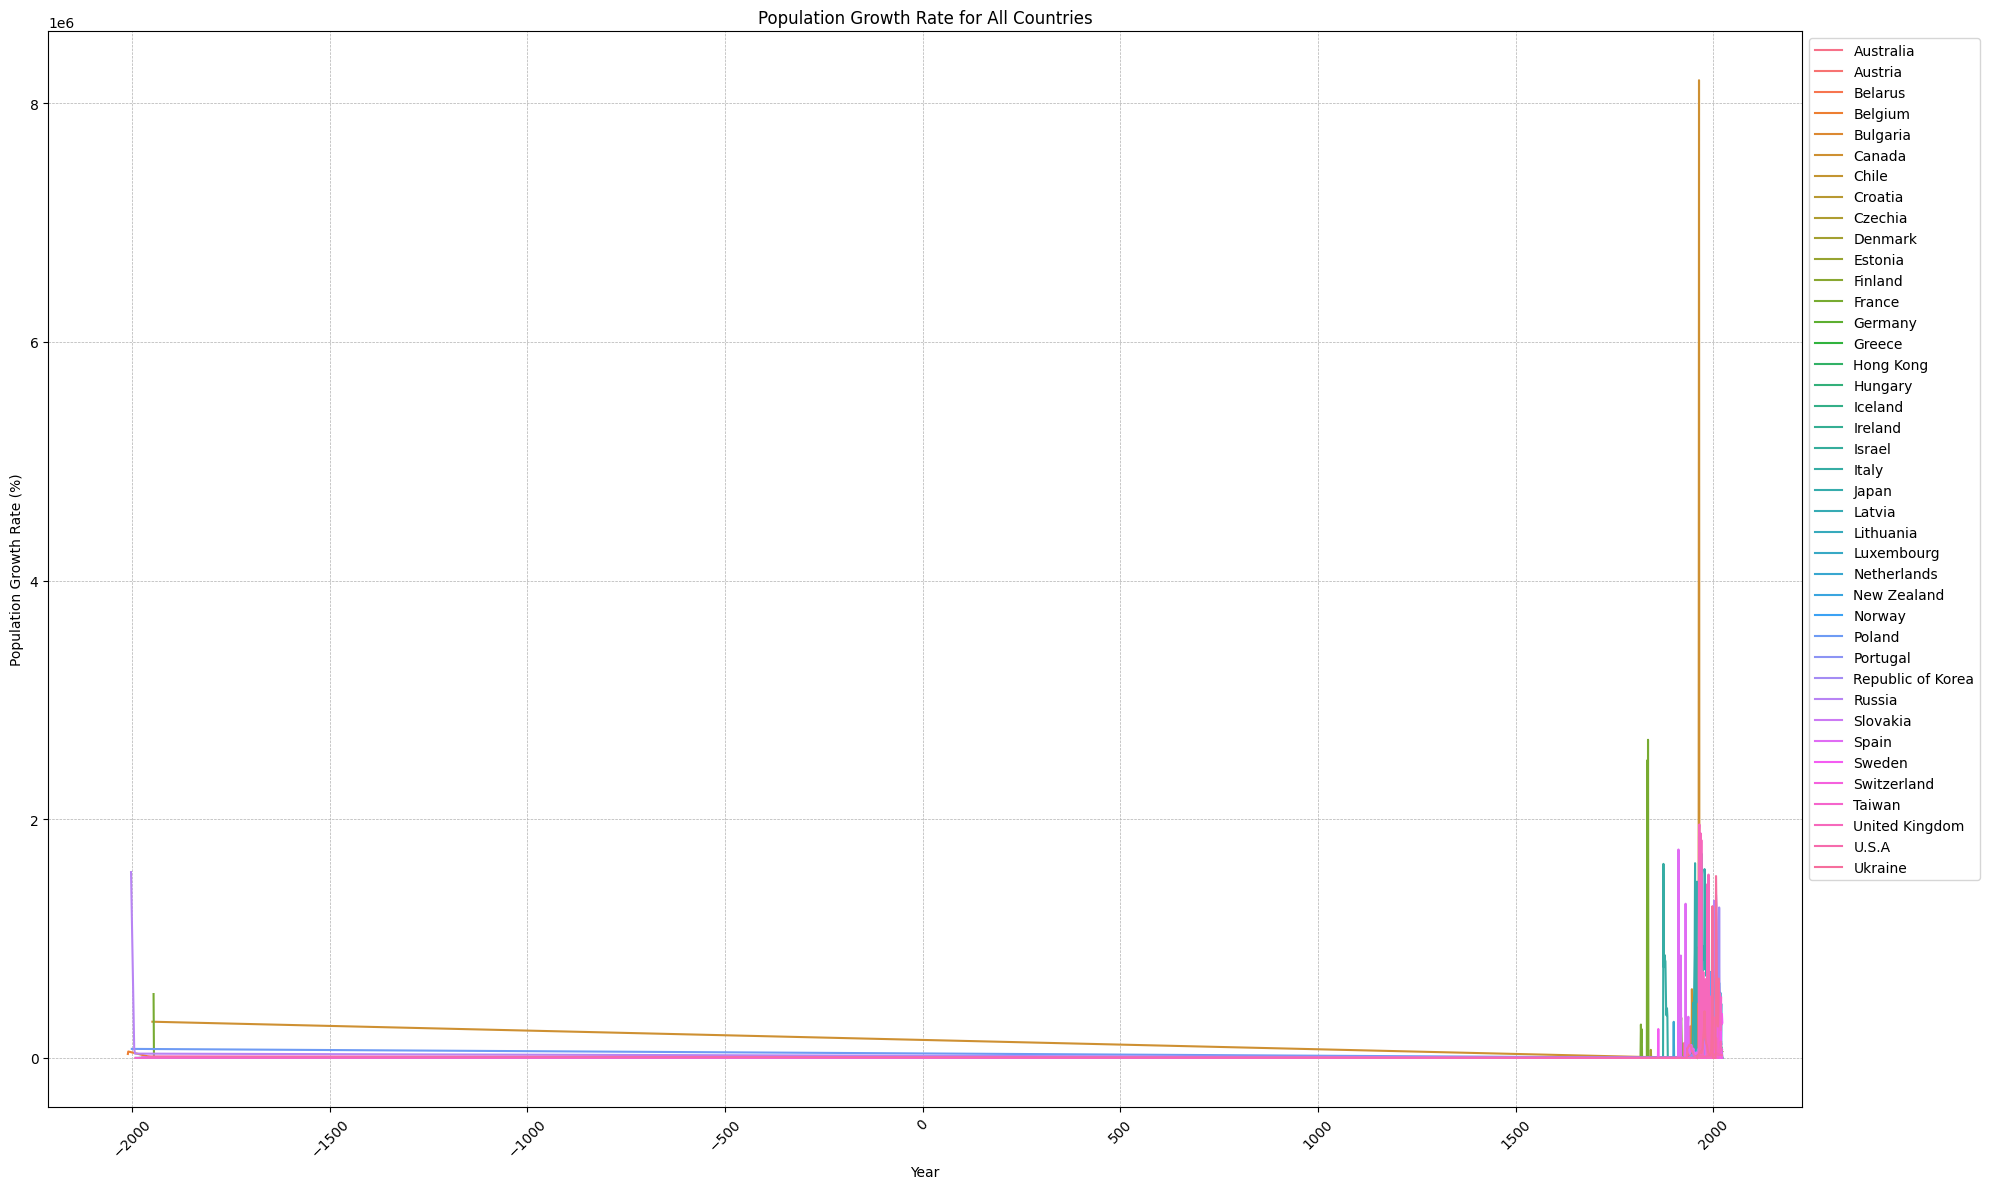

In [56]:
# Load the Population_size dataset
population_size = pd.read_csv(f"{base_path}\\Population_size.csv")

# Convert year and population columns to numeric
population_size["Year"] = pd.to_numeric(population_size["Year"], errors='coerce')
population_size["Total"] = pd.to_numeric(population_size["Total"], errors='coerce')

# Calculate year-over-year population growth rate for each country
population_size["Previous_Year_Population"] = population_size.groupby("Countries")["Total"].shift(1)
population_size["Growth_Rate"] = ((population_size["Total"] - population_size["Previous_Year_Population"]) / population_size["Previous_Year_Population"]) * 100

# Drop rows with NaN values in the Growth_Rate column (typically the first year for each country)
population_size = population_size.dropna(subset=["Growth_Rate"])

# Plot with legend
plt.figure(figsize=(20, 12))
sns.lineplot(data=population_size, x="Year", y="Growth_Rate", hue="Countries", ci=None)
plt.title("Population Growth Rate for All Countries")
plt.ylabel("Population Growth Rate (%)")
plt.xlabel("Year")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)  # Position the legend outside the plot
plt.xticks(rotation=45)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


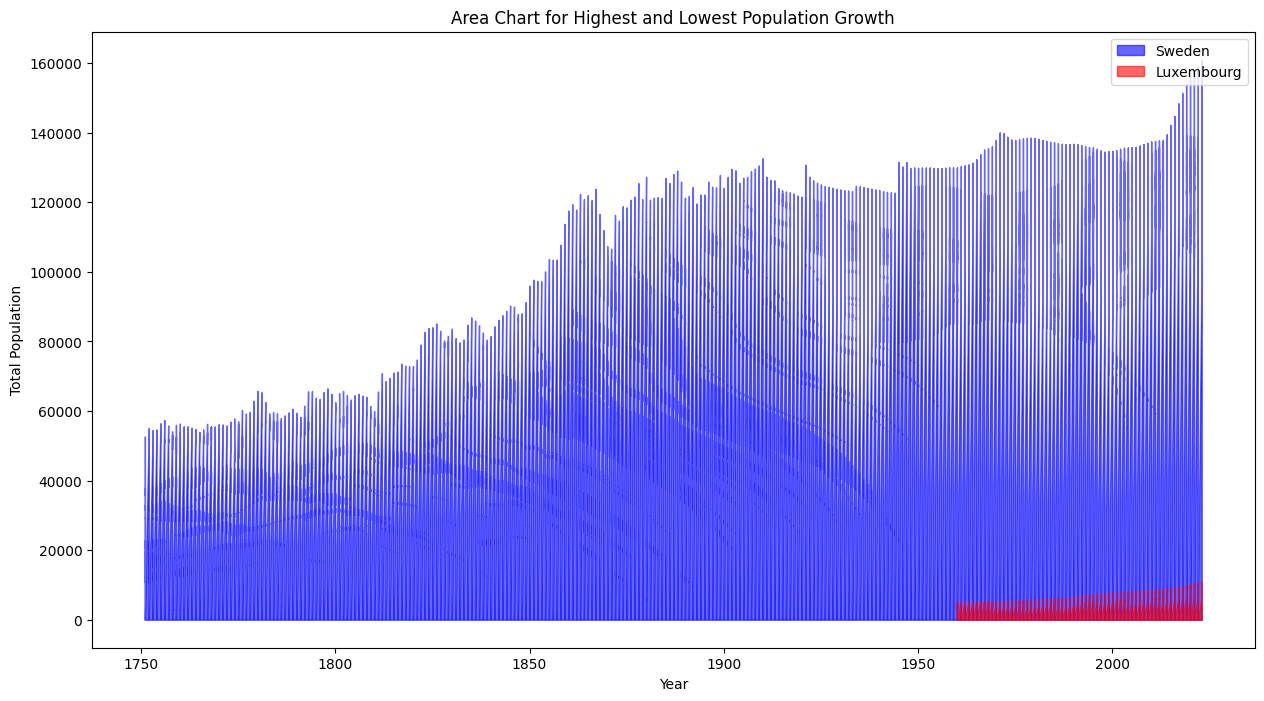

In [57]:
# Identify the most recent year in the population_size dataset
latest_year_population = population_size["Year"].max()

# Identify the country with the highest population for the latest year
highest_population_country = population_size[population_size["Year"] == latest_year_population].sort_values(by="Total", ascending=False).iloc[0]["Countries"]
highest_population_data = population_size[population_size["Countries"] == highest_population_country]

# Identify the country with the lowest population for the latest year
lowest_population_country = population_size[population_size["Year"] == latest_year_population].sort_values(by="Total", ascending=True).iloc[0]["Countries"]
lowest_population_data = population_size[population_size["Countries"] == lowest_population_country]

# Plot the area chart
plt.figure(figsize=(15, 8))
plt.fill_between(highest_population_data["Year"], highest_population_data["Total"], color='blue', label=highest_population_country, alpha=0.6)
plt.fill_between(lowest_population_data["Year"], lowest_population_data["Total"], color='red', label=lowest_population_country, alpha=0.6)
plt.title("Area Chart for Highest and Lowest Population Growth")
plt.ylabel("Total Population")
plt.xlabel("Year")
plt.legend()
plt.show()


**Dependency on Birth and Death Rates**

Understand how much of the population growth or decrease is due to natural growth (births vs. deaths) as opposed to other factors like migration

C:\Users\AKANKSHA\AppData\Local\Temp\ipykernel_12684\2522063075.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data["Total_x"] = pd.to_numeric(subset_data["Total_x"], errors='coerce')
C:\Users\AKANKSHA\AppData\Local\Temp\ipykernel_12684\2522063075.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data["Total_y"] = pd.to_numeric(subset_data["Total_y"], errors='coerce')
C:\Users\AKANKSHA\AppData\Local\Temp\ipykernel_12684\2522063075.py:16: SettingWithCopyWarning: 
A value is trying to b

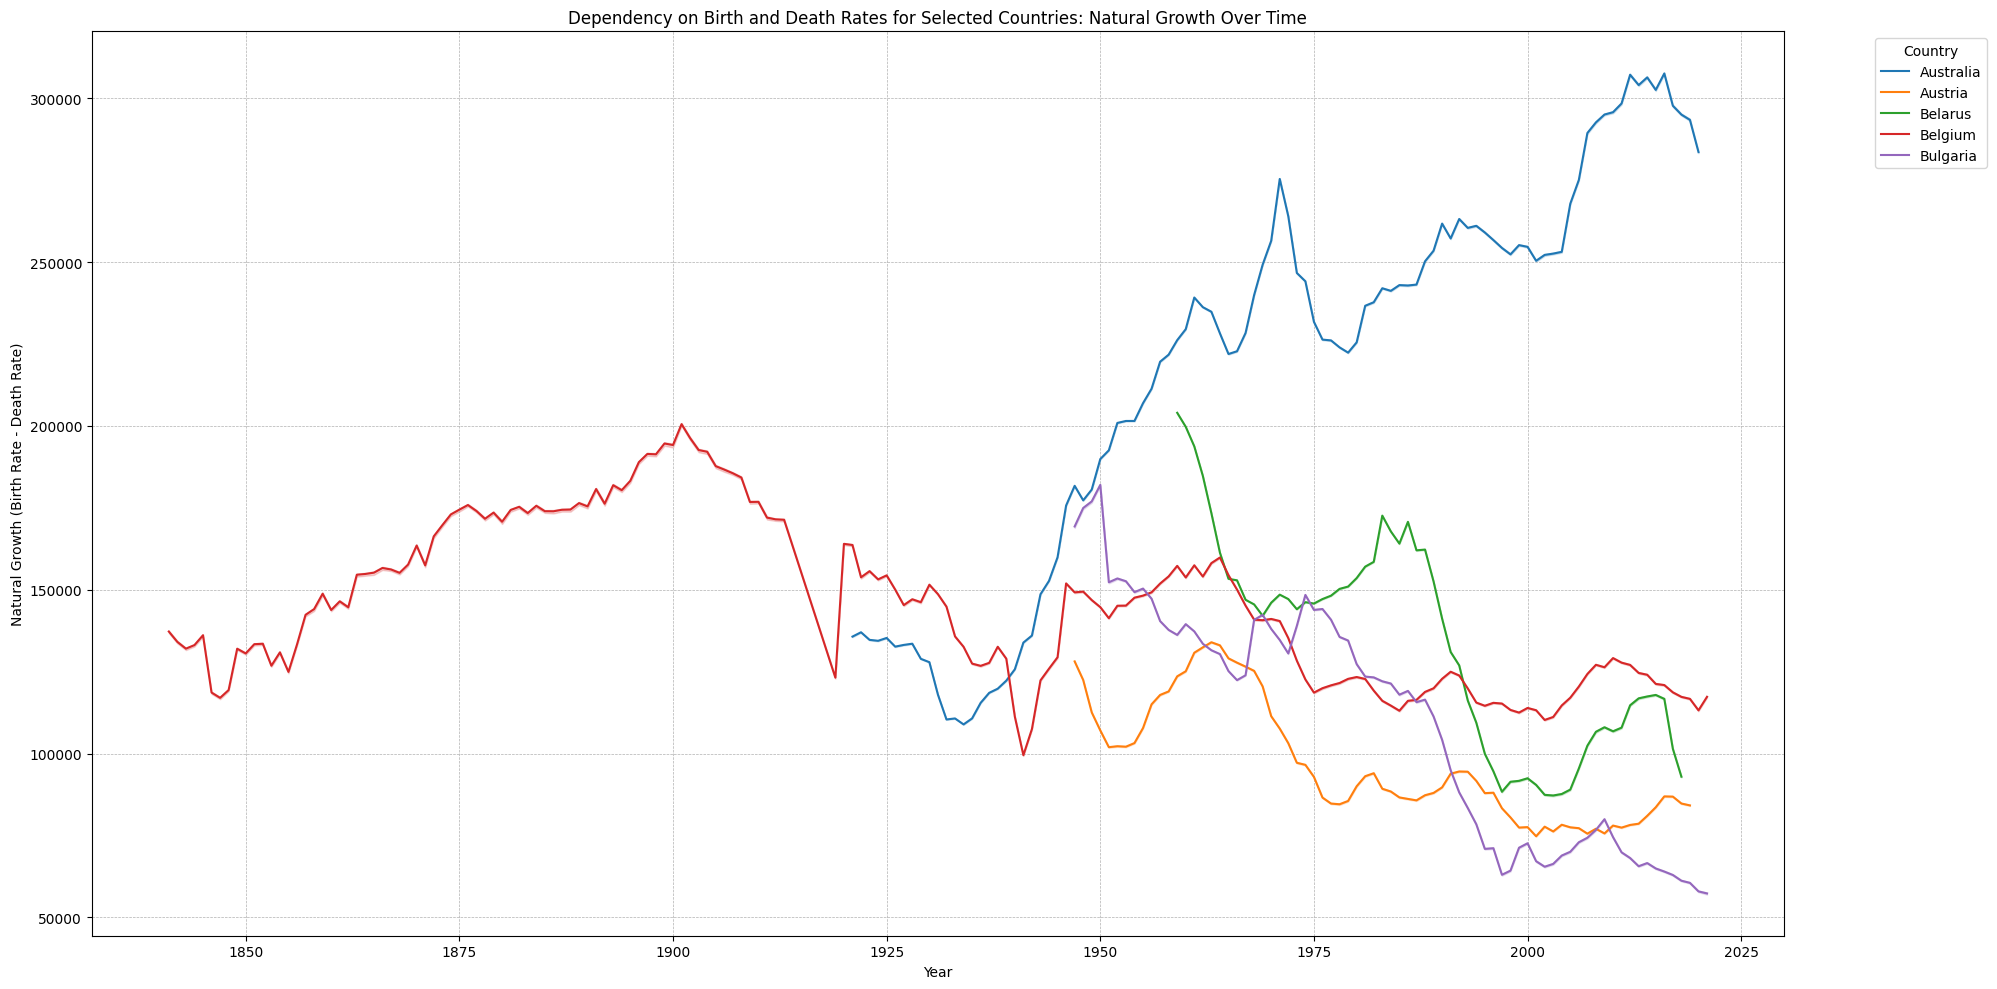

In [58]:
# Merge birth_rate and death datasets on Year and Countries
merged_data = pd.merge(birth_rate, death, how="inner", on=["Year", "Countries"])

# Drop any NaN values for simplicity (similar to our earlier creation of merged_data_cleaned)
merged_data_cleaned = merged_data.dropna(subset=["Total_x", "Total_y"])

# Assuming you want the first 5 unique countries from the merged data as a subset
subset_countries = merged_data_cleaned["Countries"].unique()[:5]
subset_data = merged_data_cleaned[merged_data_cleaned["Countries"].isin(subset_countries)]

# Convert 'Total_x' and 'Total_y' columns to numeric data type and handle errors by converting them to NaN
subset_data["Total_x"] = pd.to_numeric(subset_data["Total_x"], errors='coerce')
subset_data["Total_y"] = pd.to_numeric(subset_data["Total_y"], errors='coerce')

# Calculate the "Natural_Growth" column again
subset_data["Natural_Growth"] = subset_data["Total_x"] - subset_data["Total_y"]

# Plotting for the subset of countries
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.lineplot(data=subset_data, x="Year", y="Natural_Growth", hue="Countries", palette="tab10")

plt.title("Dependency on Birth and Death Rates for Selected Countries: Natural Growth Over Time")
plt.ylabel("Natural Growth (Birth Rate - Death Rate)")
plt.xlabel("Year")
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


c:\Users\AKANKSHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AKANKSHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AKANKSHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AKANKSHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

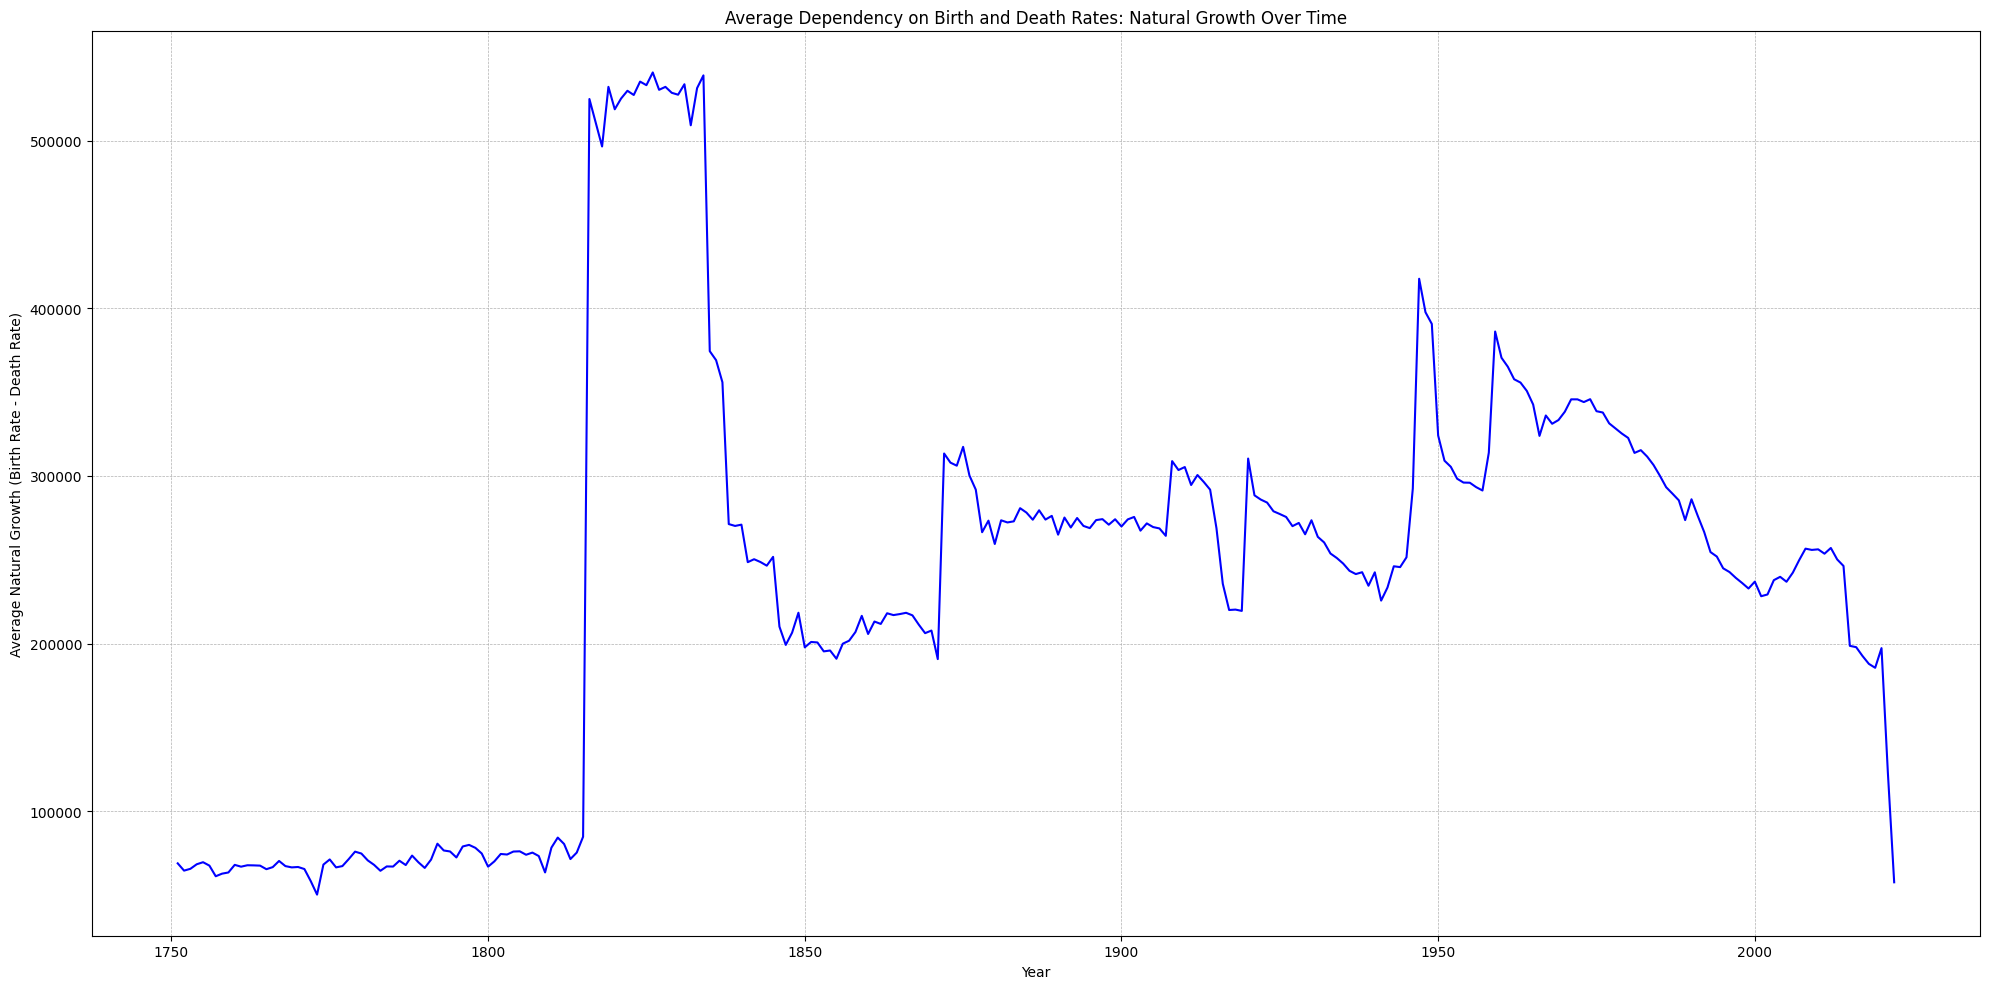

In [59]:
# Merge birth_rate and death datasets on Year and Countries
birth_death_merged_all = pd.merge(birth_rate, death, how="inner", on=["Year", "Countries"])

# Convert 'Total_x' and 'Total_y' columns to numeric data type and handle errors by converting them to NaN
birth_death_merged_all["Total_x"] = pd.to_numeric(birth_death_merged_all["Total_x"], errors='coerce')
birth_death_merged_all["Total_y"] = pd.to_numeric(birth_death_merged_all["Total_y"], errors='coerce')

# Calculate the "Natural_Growth" column for birth_death_merged_all DataFrame
birth_death_merged_all["Natural_Growth"] = birth_death_merged_all["Total_x"] - birth_death_merged_all["Total_y"]

# Calculate average natural growth for all countries over the years
average_growth = birth_death_merged_all.groupby("Year")["Natural_Growth"].mean().reset_index()

# Plotting the average natural growth
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.lineplot(data=average_growth, x="Year", y="Natural_Growth", color="blue")

plt.title("Average Dependency on Birth and Death Rates: Natural Growth Over Time")
plt.ylabel("Average Natural Growth (Birth Rate - Death Rate)")
plt.xlabel("Year")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


4. **Pollution and Population Size (Hypothetical)**

c:\Users\AKANKSHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AKANKSHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AKANKSHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AKANKSHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

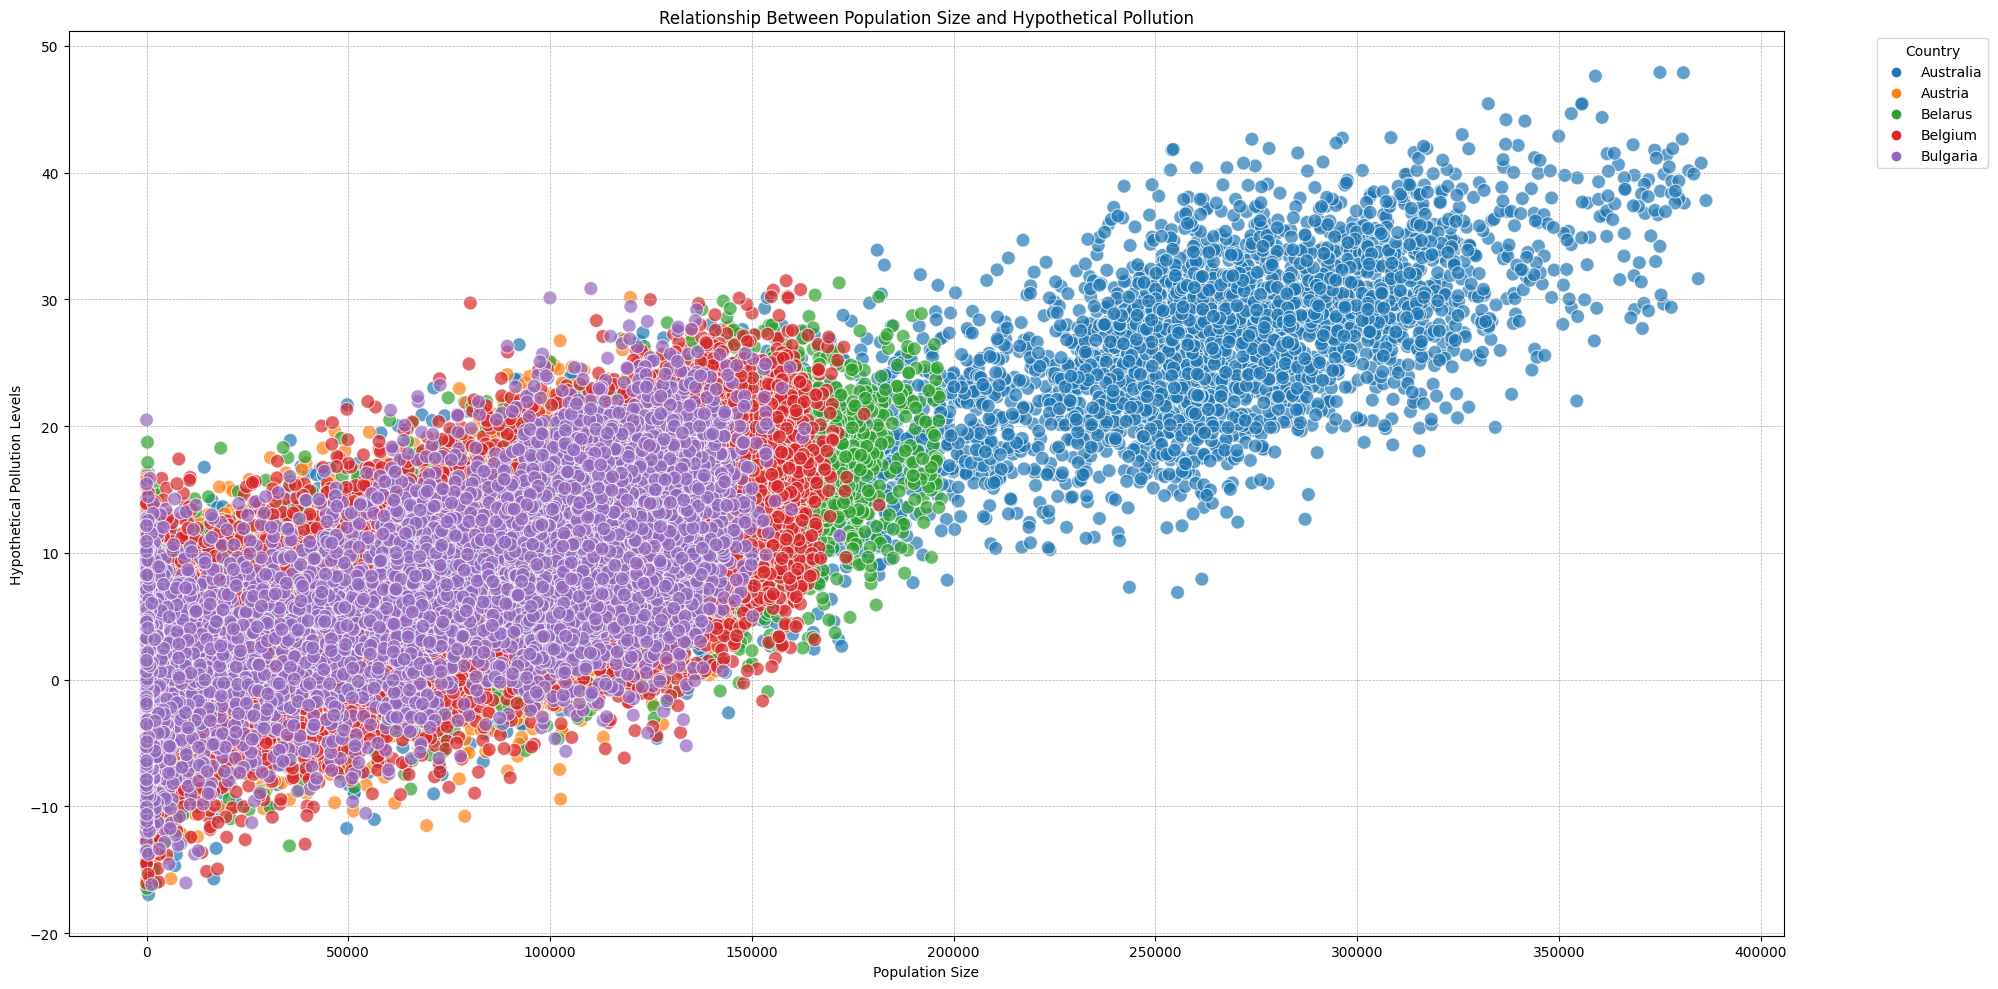

In [60]:
# Assuming you want the first 5 unique countries from the population_size data as a subset
selected_countries = population_size["Countries"].unique()[:5]

# Convert 'Total' column to numeric data type and handle errors by converting non-numeric entries to NaN
population_size["Total"] = pd.to_numeric(population_size["Total"], errors='coerce')

# Generate hypothetical pollution data for the population dataset
population_size["Hypothetical_Pollution"] = population_size["Total"] * 0.0001 + np.random.normal(0, 5, len(population_size))

# Select a subset of countries for visualization (for clarity)
subset_data_pollution = population_size[population_size["Countries"].isin(selected_countries)]

# Plotting the relationship between Population Size and Hypothetical Pollution
plt.figure(figsize=(20, 10))
sns.scatterplot(data=subset_data_pollution, x="Total", y="Hypothetical_Pollution", hue="Countries", palette="tab10", s=100, alpha=0.7)

plt.title("Relationship Between Population Size and Hypothetical Pollution")
plt.ylabel("Hypothetical Pollution Levels")
plt.xlabel("Population Size")
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


6. **Economic Factors**:
    - With GDP or economic data, we could investigate the relationship between economic growth and population growth. For example, do countries with higher GDP growth also have higher population growth rates?

Create a hypothetical GDP growth dataset.
Merge this dataset with our population growth dataset.
Visualize the relationship between GDP growth and population growth for a subset of countries.


8. **Historical Events Impact for all Countries**:

C:\Users\AKANKSHA\AppData\Local\Temp\ipykernel_21612\673102590.py:8: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  population_size = pd.read_csv(base_path + "\\Population_size.csv")


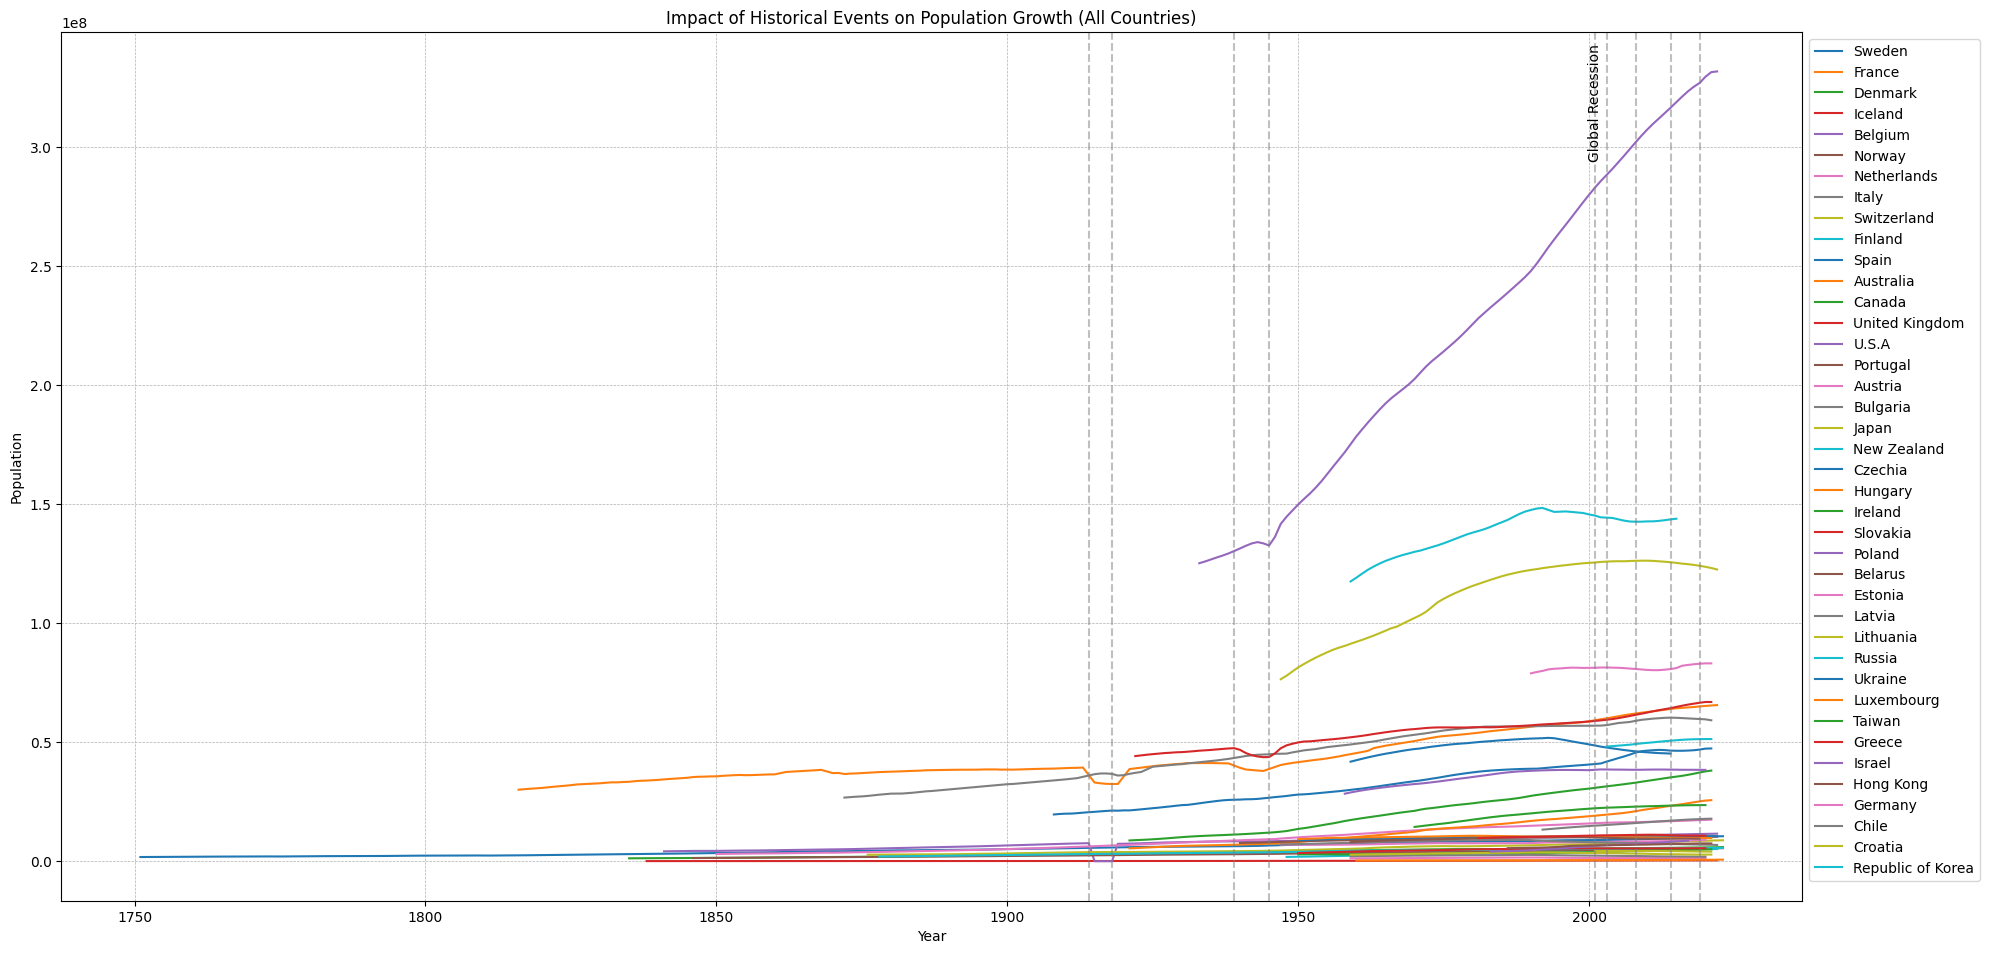

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the base path
base_path = r"C:\Users\AKANKSHA\Downloads\Dissertation Final Dataset"

# Load the data
population_size = pd.read_csv(base_path + "\\Population_size.csv")

# Function to clean the "Total" column
def clean_total(value):
    try:
        # Split at any non-numeric character and take the first part
        cleaned_value = str(value).split('.')[0]
        return int(cleaned_value)
    except:
        return None

# Clean the "Total" column
population_size["Total"] = population_size["Total"].apply(clean_total)

# Exclude non-numeric entries from the "Year" column
population_size = population_size[population_size["Year"].apply(lambda x: str(x).isnumeric())]

# Convert the "Year" column to integer
population_size["Year"] = population_size["Year"].astype(int)

# Aggregating the data to get the total population for each year for each country
population_aggregated = population_size.groupby(["Year", "Countries"])["Total"].sum().reset_index()

# Historical events
historical_events = {
     1914: "Start of World War I",
    1918: "End of World War I",
    1939: "Start of World War II",
    1945: "End of World War II",
    2001: "Global Recession",
    2003: "SARS Epidemic",
    2008: "Financial Crisis",
    2014: "Ebola Outbreak",
    2019: "COVID-19 Pandemic"
}

# Plotting the population growth for all countries and overlaying historical events
plt.figure(figsize=(20, 10))

# Using a loop to plot each country's data
for country in population_aggregated["Countries"].unique():
    country_data = population_aggregated[population_aggregated["Countries"] == country]
    plt.plot(country_data["Year"], country_data["Total"], label=country)

# Overlaying historical events
for year, event in historical_events.items():
    plt.axvline(x=year, color='grey', linestyle='--', alpha=0.5)
    # Adding text for the first historical event to avoid clutter
    if event == "Global Recession":
        plt.text(year, plt.gca().get_ylim()[1] - 5000000, event, rotation=90, ha='center', va='top')

plt.title("Impact of Historical Events on Population Growth (All Countries)")
plt.ylabel("Population")
plt.xlabel("Year")
plt.legend(loc="upper left", bbox_to_anchor=(1,1), ncol=1)  # Adjusting the legend to be outside the plot
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


**Lowest affected countries due to Historical Events**

C:\Users\AKANKSHA\AppData\Local\Temp\ipykernel_21612\4272596463.py:8: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  population_size = pd.read_csv(base_path + "\\Population_size.csv")


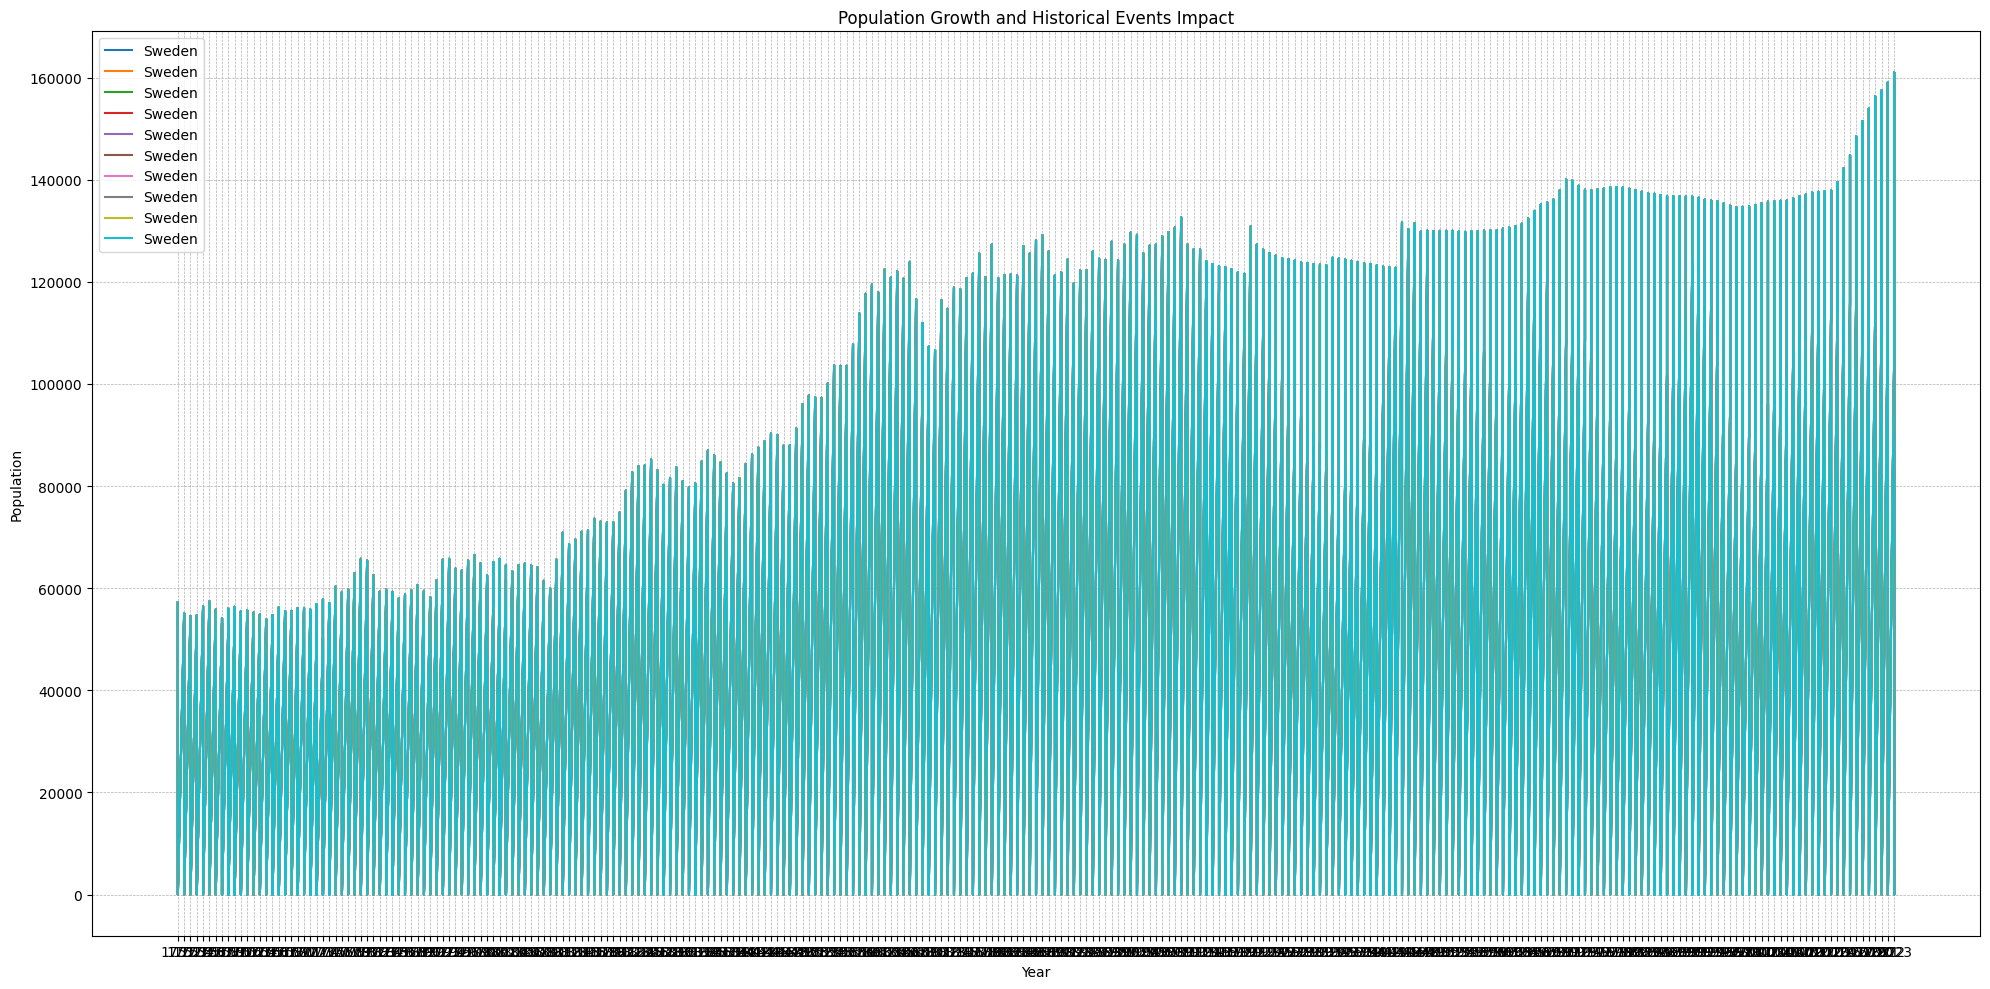

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the base path
base_path = r"C:\Users\AKANKSHA\Downloads\Dissertation Final Dataset"

# Load the population size data
population_size = pd.read_csv(base_path + "\\Population_size.csv")

# Convert the "Total" column to numeric, coercing errors
population_size["Total"] = pd.to_numeric(population_size["Total"], errors='coerce')

# Drop any rows with NaN values in the "Total" column
population_size = population_size.dropna(subset=["Total"])

# Define historical events
historical_events = {
    1914: "Start of World War I",
    1918: "End of World War I",
    1939: "Start of World War II",
    1945: "End of World War II",
    2001: "Global Recession",
    2003: "SARS Epidemic",
    2008: "Financial Crisis",
    2014: "Ebola Outbreak",
    2019: "COVID-19 Pandemic"
}

# Filtering the historical events to only those years present in the dataset
available_years = set(population_size["Year"].unique())
historical_events = {year: event for year, event in historical_events.items() if year in available_years}

# Plotting
plt.figure(figsize=(20, 10))

# For demonstration purposes, let's plot the top 10 countries with the largest population in the latest year
latest_year = population_size["Year"].max()
top_countries = population_size[population_size["Year"] == latest_year].nlargest(10, "Total")["Countries"].tolist()

# Plotting the population growth of these top countries
for country in top_countries:
    country_data = population_size[population_size["Countries"] == country]
    plt.plot(country_data["Year"], country_data["Total"], label=country)

# Overlay historical events
for year, event in historical_events.items():
    plt.axvline(x=year, color='grey', linestyle='--', alpha=0.5)
    plt.text(year, plt.gca().get_ylim()[1] - 5000000, event, rotation=90, ha='center', va='top')

plt.title("Population Growth and Historical Events Impact")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(loc="upper left")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


**Countries with lowest fertility rate**

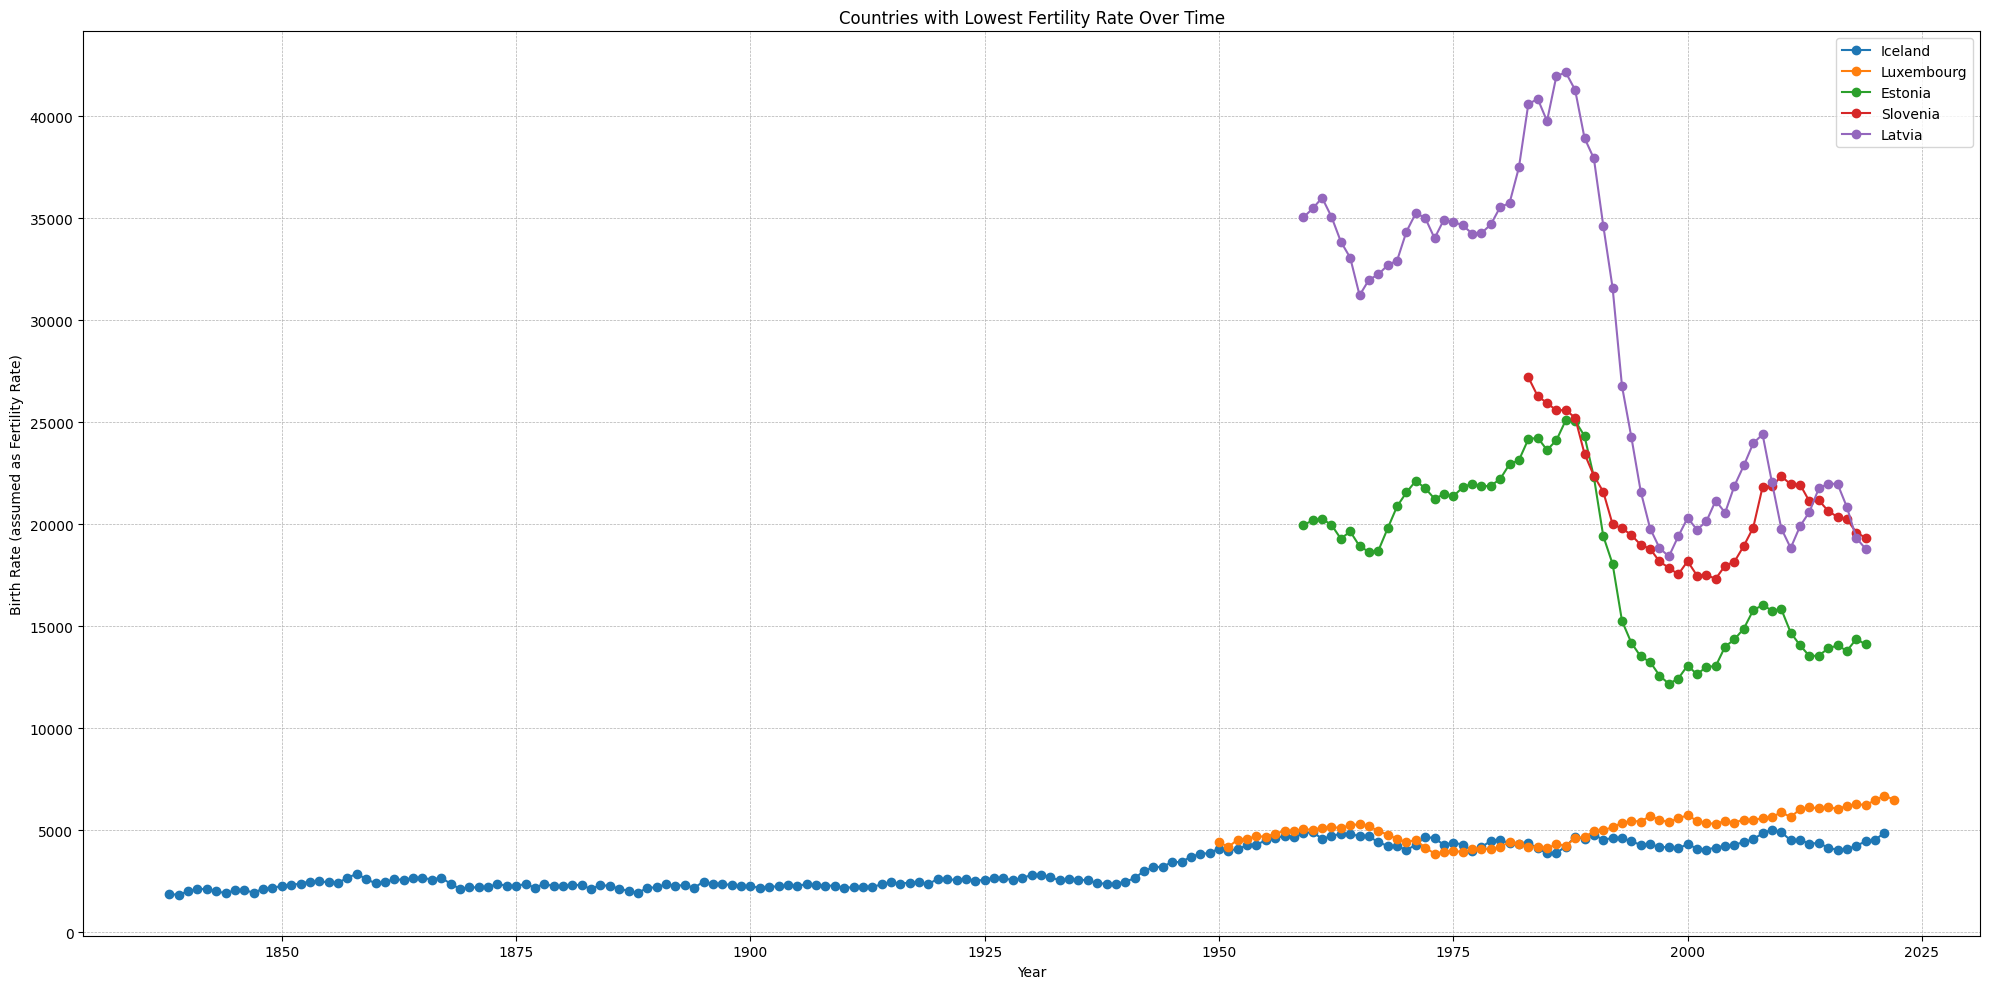

In [ ]:
# Clean data if necessary
birth_rate["Total"] = birth_rate["Total"].apply(pd.to_numeric, errors='coerce')

# Calculate the average birth rate for each country across all years
average_birth_rates = birth_rate.groupby("Countries")["Total"].mean()

# Identify the top 5 countries with the lowest average birth rates
lowest_countries = average_birth_rates.nsmallest(5).index.tolist()

# Filter the data for these countries
lowest_countries_data = birth_rate[birth_rate["Countries"].isin(lowest_countries)]

# Plotting
plt.figure(figsize=(20, 10))
for country in lowest_countries:
    country_data = lowest_countries_data[lowest_countries_data["Countries"] == country]
    plt.plot(country_data["Year"], country_data["Total"], label=country, marker='o')

plt.title("Countries with Lowest Fertility Rate Over Time")
plt.ylabel("Birth Rate (assumed as Fertility Rate)")
plt.xlabel("Year")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


**Countries with highest fertility rate**

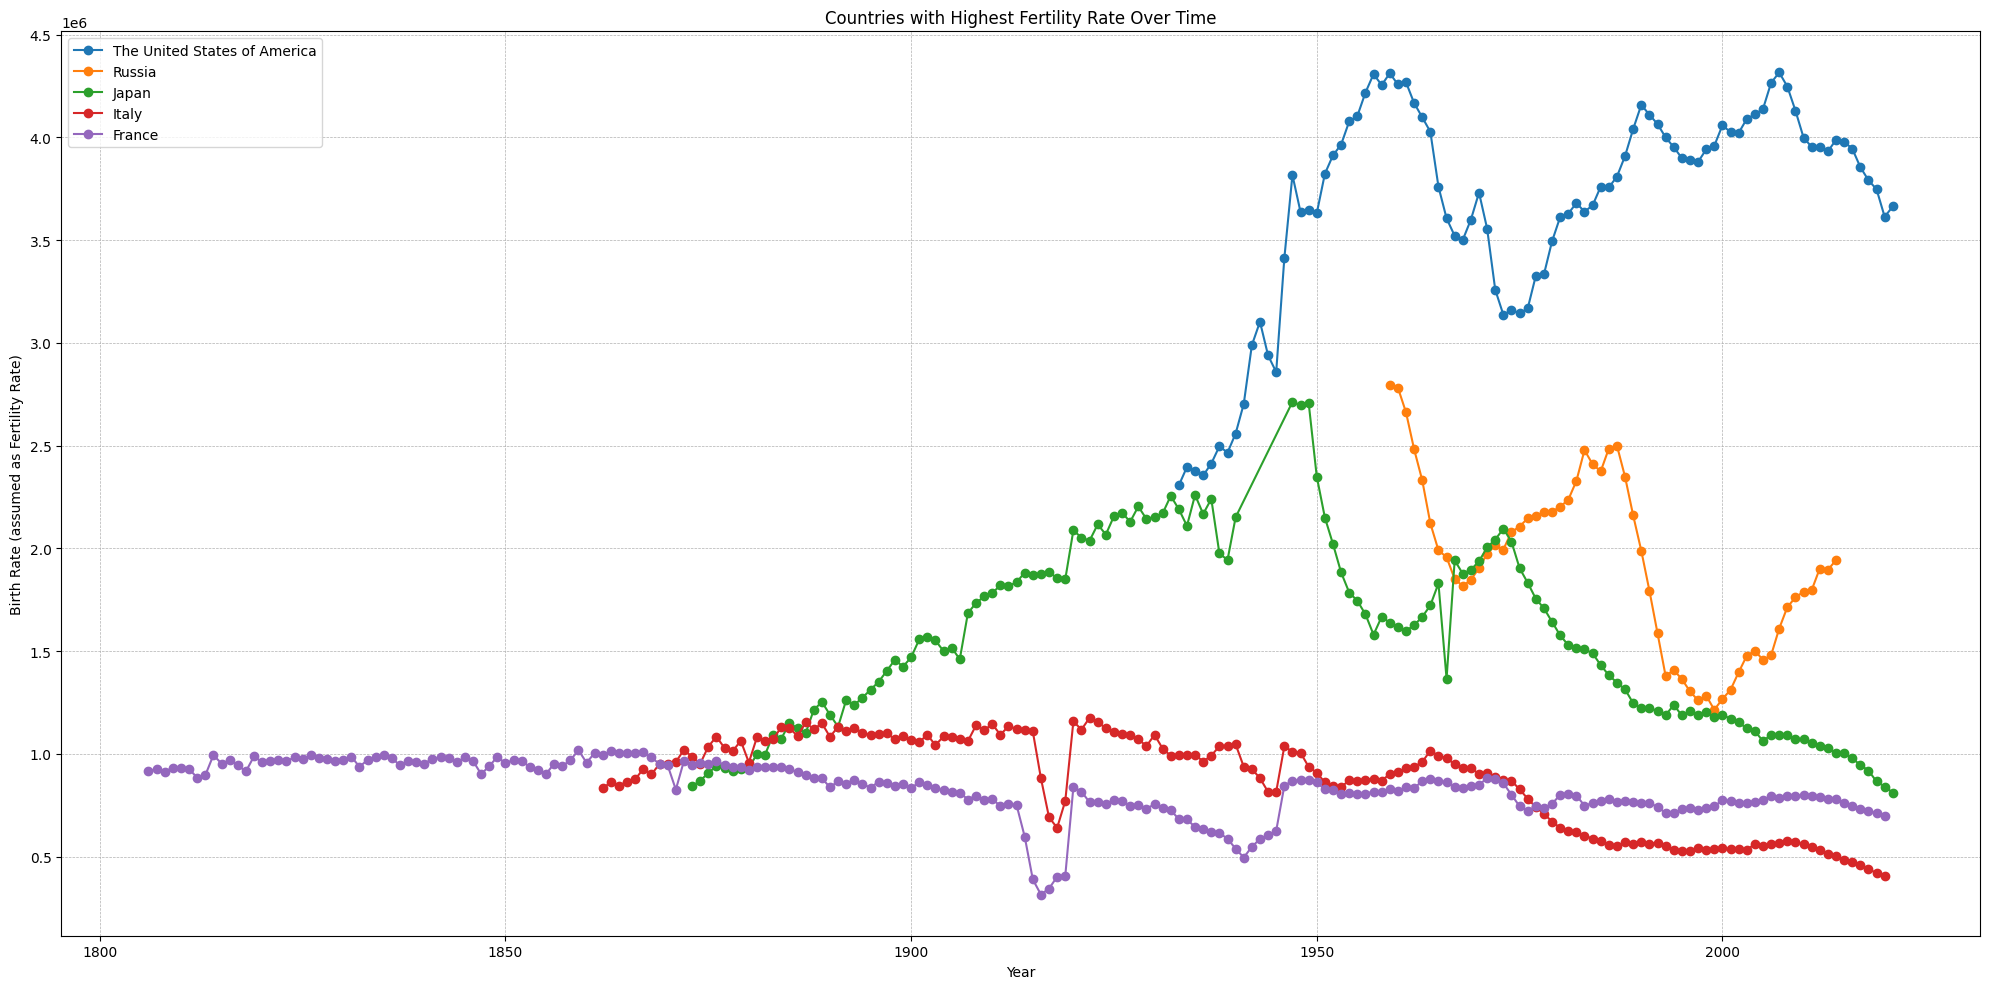

In [ ]:

# Clean data if necessary
birth_rate["Total"] = birth_rate["Total"].apply(pd.to_numeric, errors='coerce')

# Calculate the average birth rate for each country across all years
average_birth_rates = birth_rate.groupby("Countries")["Total"].mean()

# Identify the top 5 countries with the highest average birth rates
highest_countries = average_birth_rates.nlargest(5).index.tolist()

# Filter the data for these countries
highest_countries_data = birth_rate[birth_rate["Countries"].isin(highest_countries)]

# Plotting
plt.figure(figsize=(20, 10))
for country in highest_countries:
    country_data = highest_countries_data[highest_countries_data["Countries"] == country]
    plt.plot(country_data["Year"], country_data["Total"], label=country, marker='o')

plt.title("Countries with Highest Fertility Rate Over Time")
plt.ylabel("Birth Rate (assumed as Fertility Rate)")
plt.xlabel("Year")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


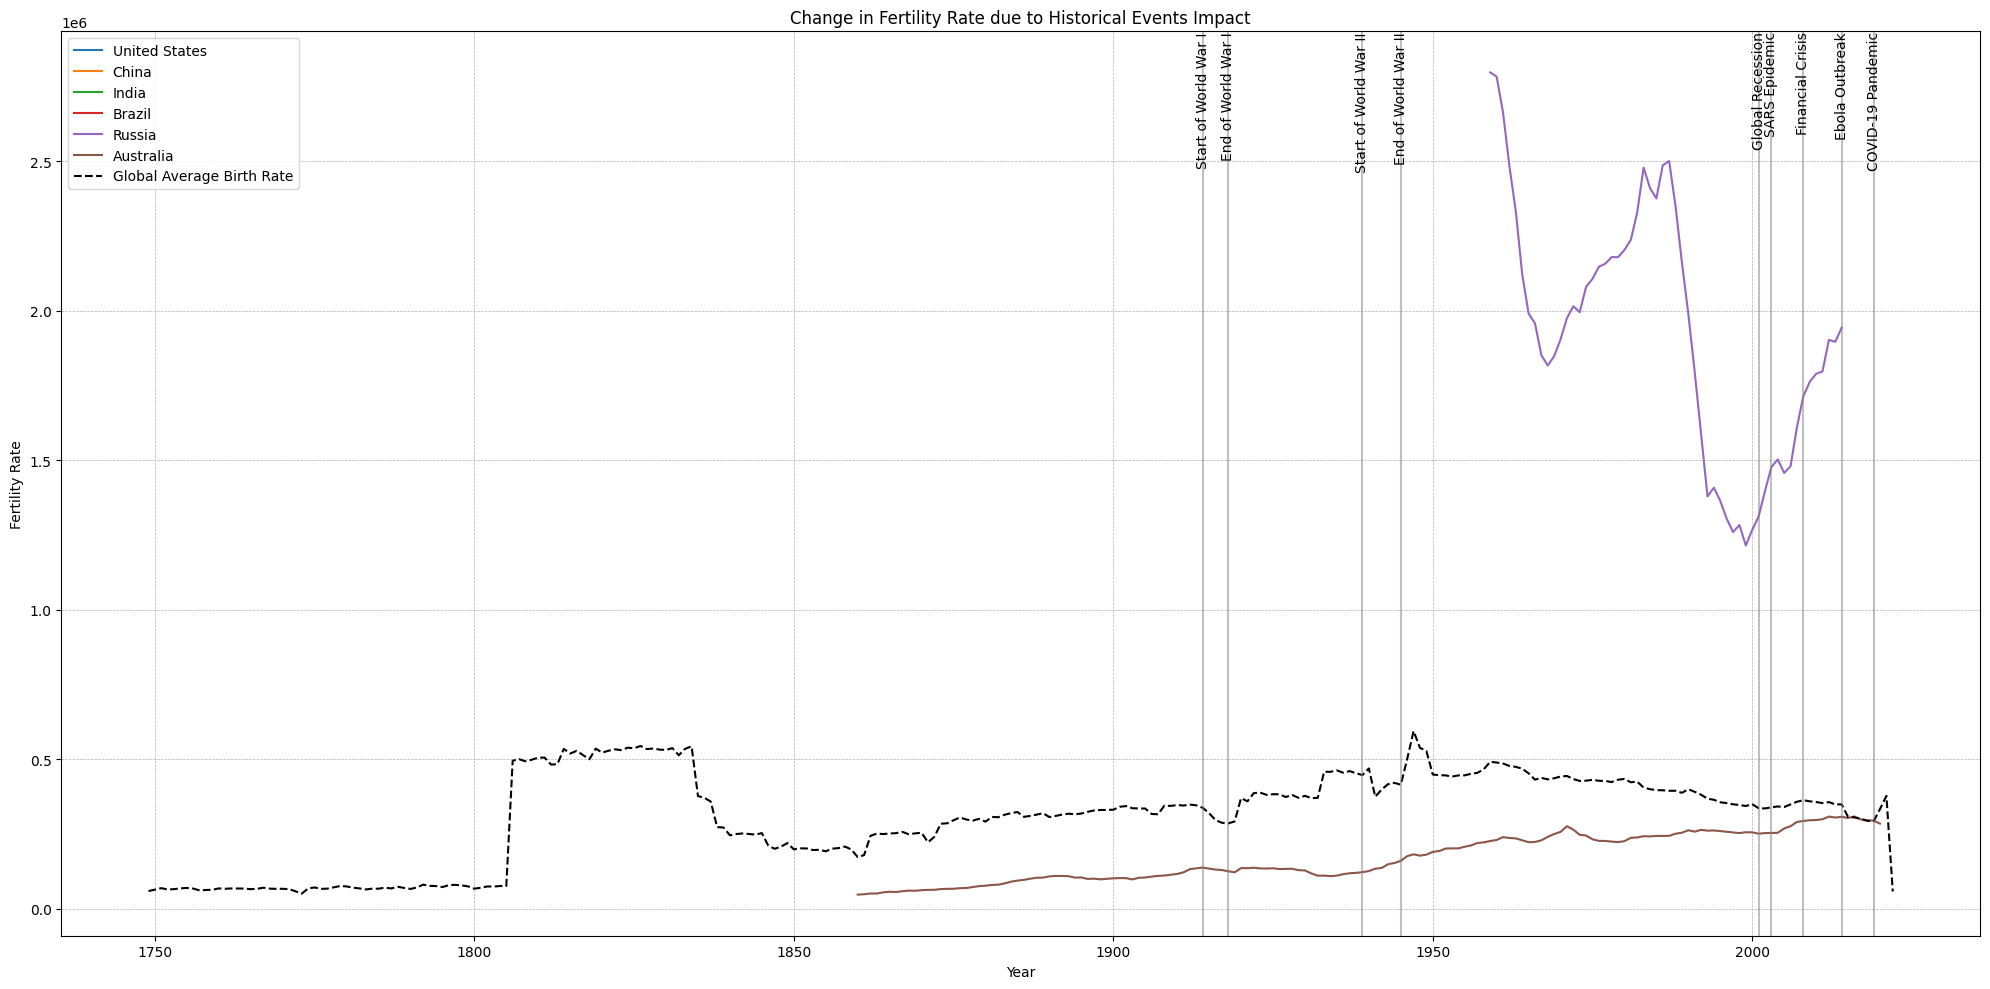

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the birth rate data
birth_rate = pd.read_csv(base_path + "\\Birth rate.csv")

# Convert the "Total" column to numeric, coercing errors if any
birth_rate["Total"] = pd.to_numeric(birth_rate["Total"], errors='coerce')

# Drop any rows with NaN values in the "Total" column
birth_rate = birth_rate.dropna(subset=["Total"])

# Define historical events
historical_events = {
    1914: "Start of World War I",
    1918: "End of World War I",
    1939: "Start of World War II",
    1945: "End of World War II",
    2001: "Global Recession",
    2003: "SARS Epidemic",
    2008: "Financial Crisis",
    2014: "Ebola Outbreak",
    2019: "COVID-19 Pandemic"
}

# Filtering the historical events to only those years present in the dataset
available_years = set(birth_rate["Year"].unique())
historical_events = {year: event for year, event in historical_events.items() if year in available_years}

# Plotting
plt.figure(figsize=(20, 10))

# For demonstration, let's plot a subset of countries along with the global average
countries_to_plot = ["United States", "China", "India", "Brazil", "Russia", "Australia"]
for country in countries_to_plot:
    country_data = birth_rate[birth_rate["Countries"] == country]
    plt.plot(country_data["Year"], country_data["Total"], label=country)

# Plotting the global average birth rate
average_birth_rate = birth_rate.groupby("Year")["Total"].mean().reset_index()
plt.plot(average_birth_rate["Year"], average_birth_rate["Total"], label="Global Average Birth Rate", color="black", linestyle="--")

# Overlay historical events
for year, event in historical_events.items():
    plt.axvline(x=year, color='grey', linestyle='-', alpha=0.5)
    plt.text(year, plt.gca().get_ylim()[1] - 0.1, event, rotation=90, ha='center', va='top')

plt.title("Change in Fertility Rate due to Historical Events Impact")
plt.xlabel("Year")
plt.ylabel("Fertility Rate")
plt.legend(loc="upper left")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


**Age-specific Death Rates for Highly Affected Countries**

C:\Users\AKANKSHA\AppData\Local\Temp\ipykernel_21612\3621220349.py:7: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  death = pd.read_csv(base_path + "\\Death.csv")


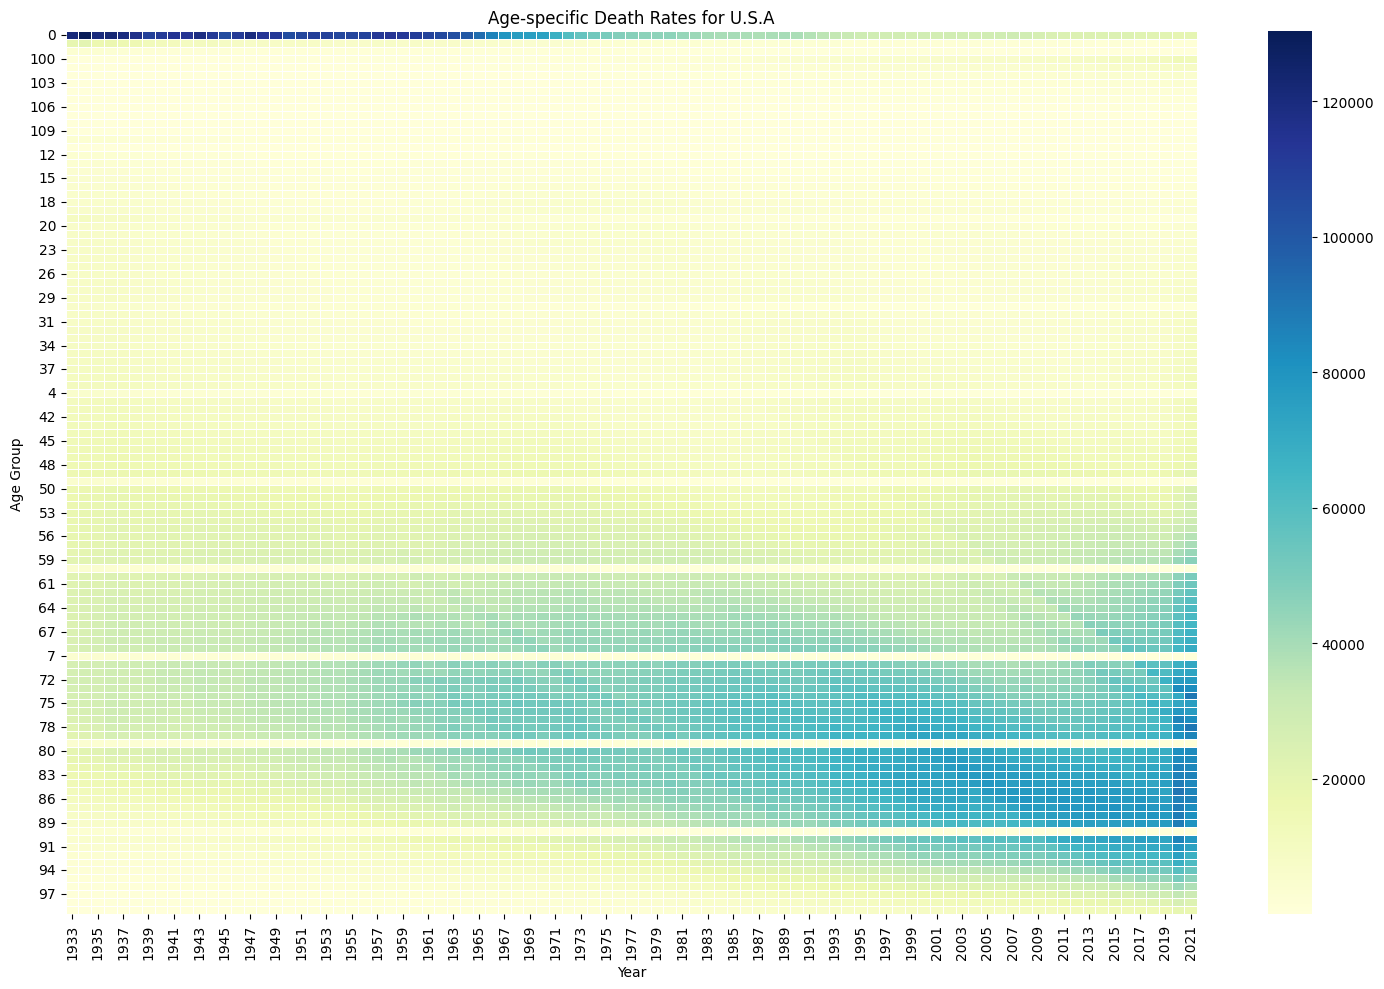

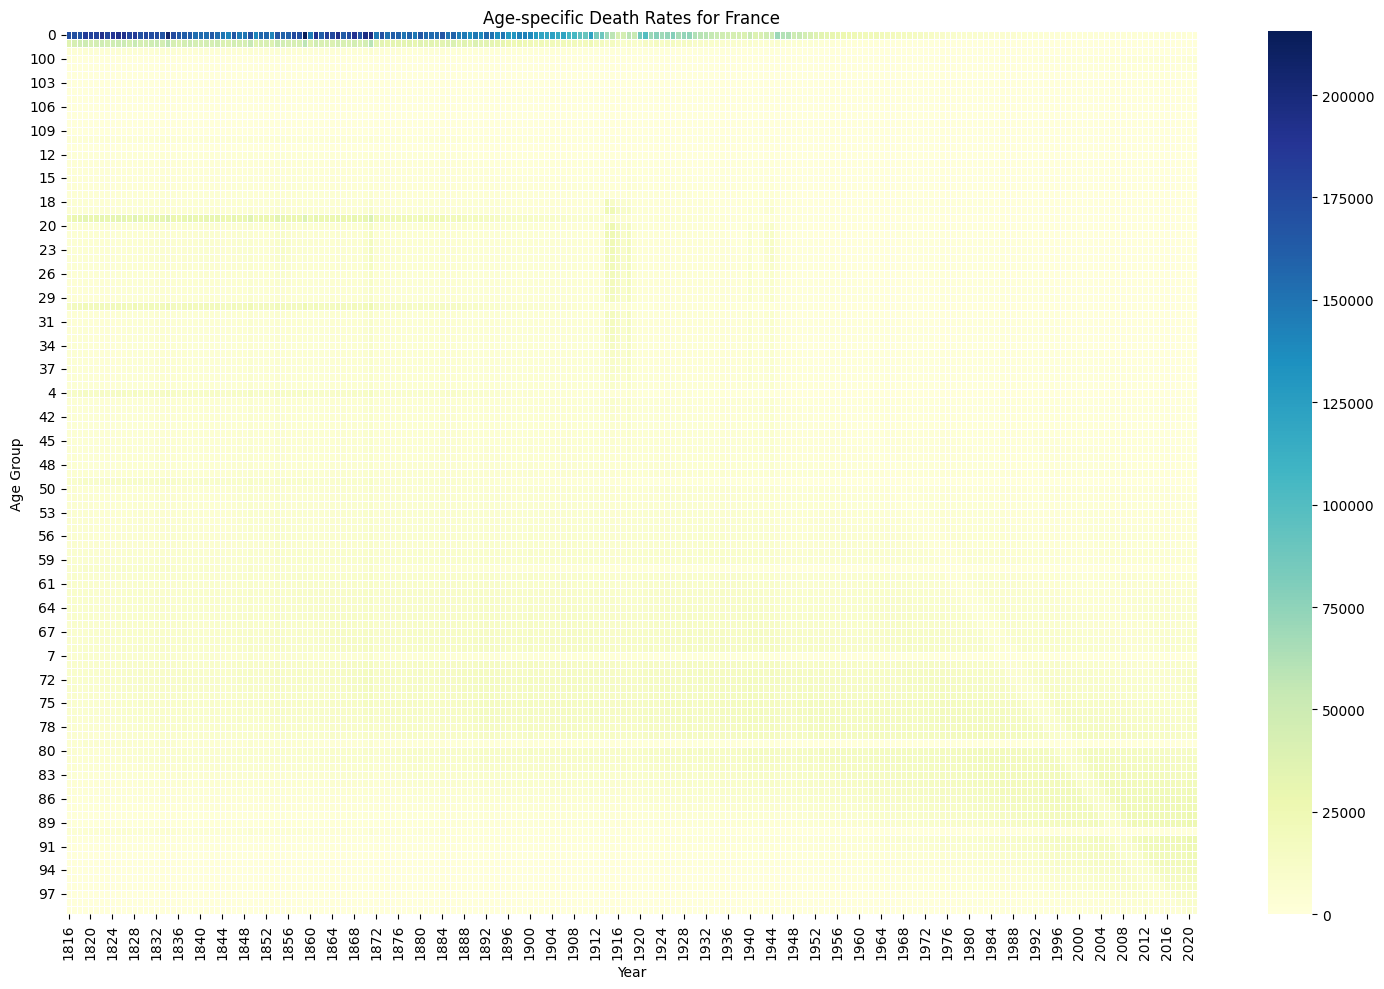

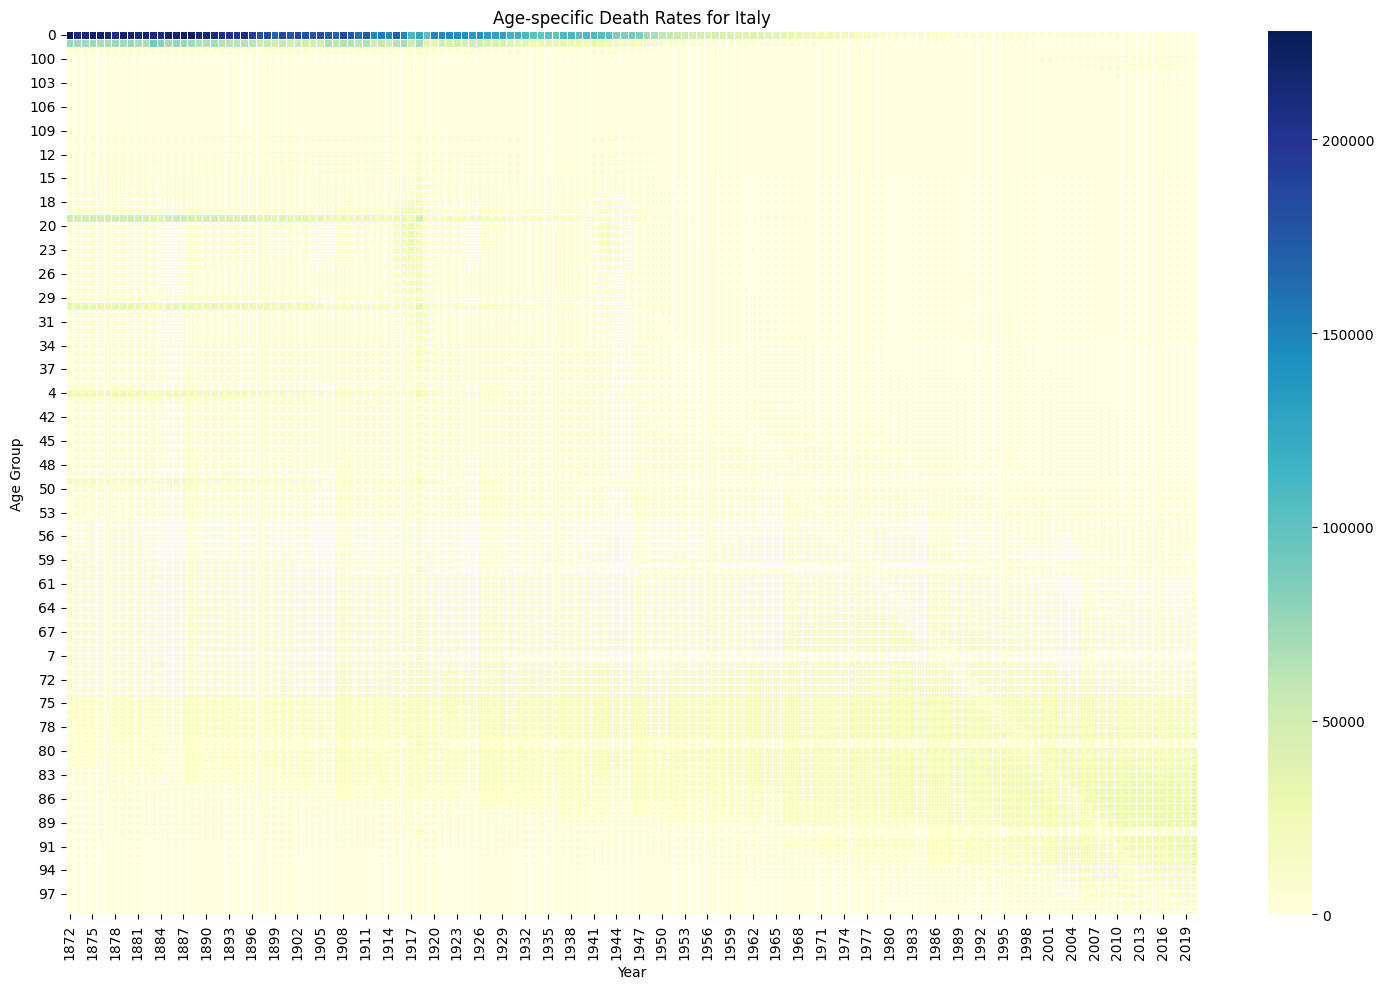

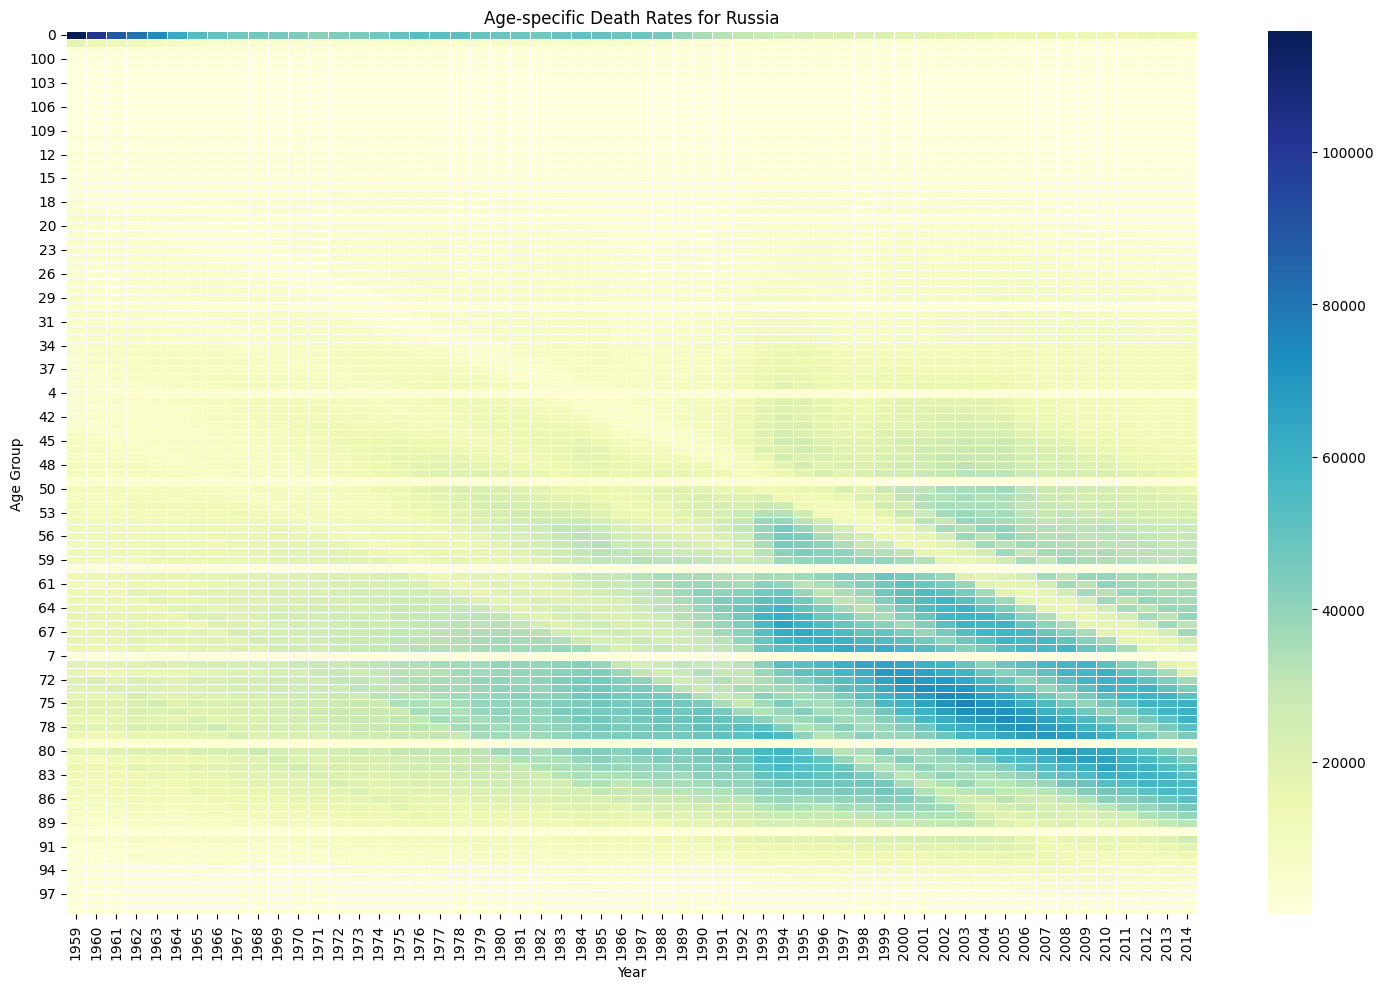

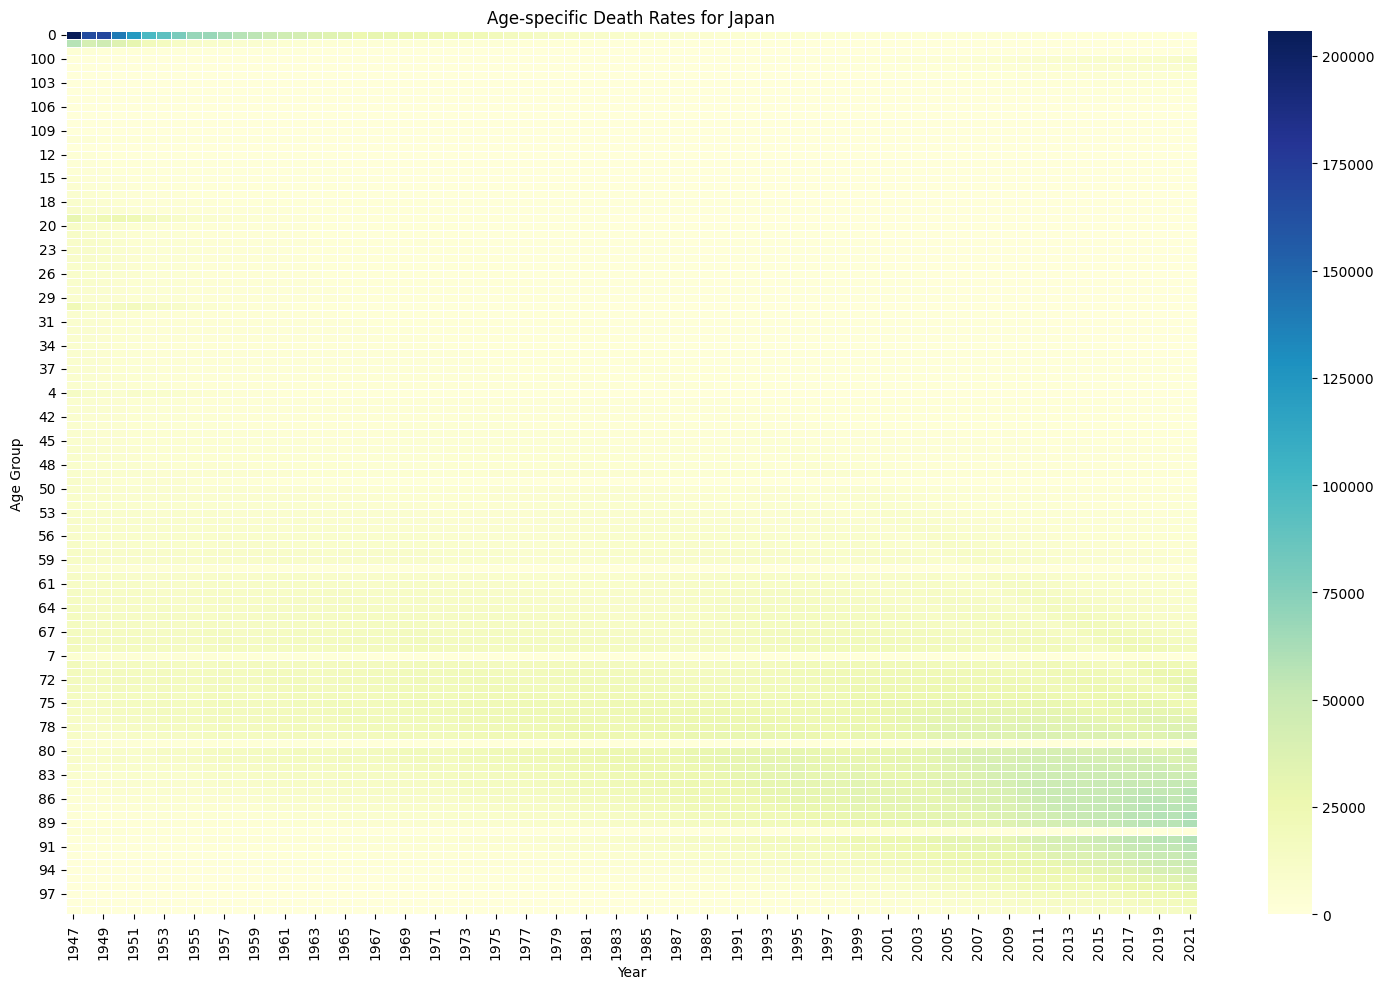

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
base_path = r"C:\Users\AKANKSHA\Downloads\Dissertation Final Dataset"
death = pd.read_csv(base_path + "\\Death.csv")

# Convert 'Age' and 'Total' columns for proper processing
death['Age'] = death['Age'].astype(str)
death['Total'] = pd.to_numeric(death['Total'], errors='coerce')

# Determine the top N countries with the highest total deaths
N = 5
top_countries = death.groupby("Countries")["Total"].sum().nlargest(N).index.tolist()

# Plotting age-specific death rates for top N countries
for country in top_countries:
    filtered_data = death[death["Countries"] == country]
    heatmap_data = filtered_data.pivot_table(index="Age", columns="Year", values="Total", aggfunc='mean')
    
    plt.figure(figsize=(15, 10))
    sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5)
    plt.title(f"Age-specific Death Rates for {country}")
    plt.ylabel("Age Group")
    plt.xlabel("Year")
    plt.tight_layout()
    plt.show()


The above code will create a heatmap where each cell's color intensity corresponds to the death rate for a particular age group in a given year. Darker shades represent higher death rates

c:\Users\AKANKSHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AKANKSHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AKANKSHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\AKANKSHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

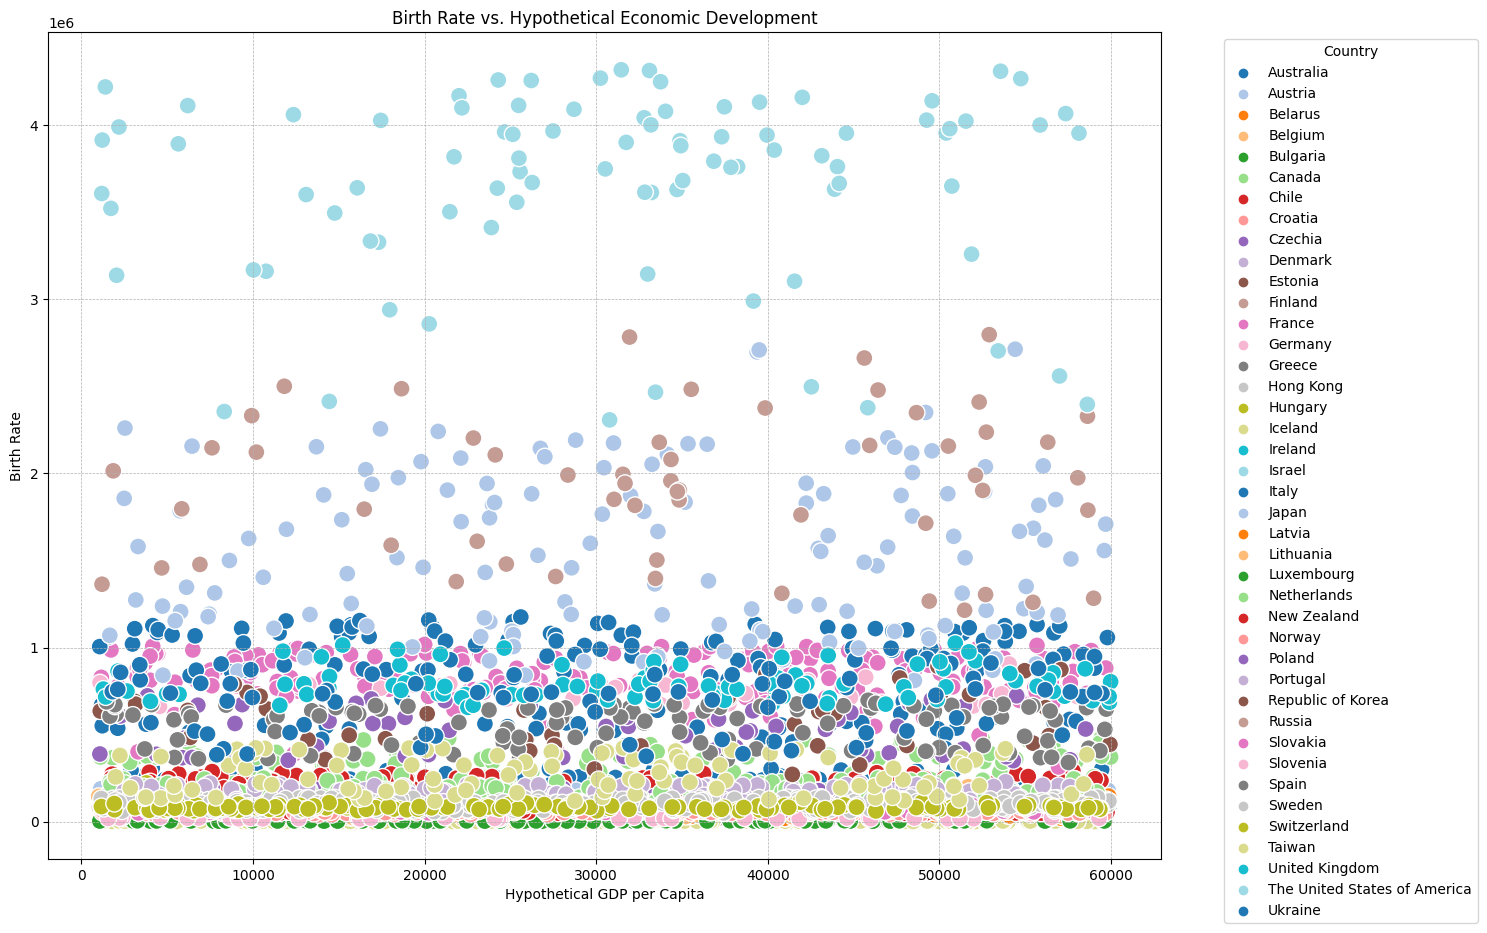

In [ ]:
# Introducing hypothetical GDP per capita data (random numbers between 1000 and 60000 for demonstration purposes)
birth_rate['Hypothetical_GDP_per_capita'] = np.random.randint(1000, 60000, size=len(birth_rate))

# Plotting
plt.figure(figsize=(15, 10))
sns.scatterplot(data=birth_rate, x="Hypothetical_GDP_per_capita", y="Total", hue="Countries", palette="tab20", edgecolor="w", s=150)

plt.title("Birth Rate vs. Hypothetical Economic Development")
plt.ylabel("Birth Rate")
plt.xlabel("Hypothetical GDP per Capita")
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


***Life Table Analysis***

In [ ]:
# Display the first few rows of the filtered_life_table DataFrame to inspect the data
filtered_life_table_head = filtered_life_table.head()

# Display the shape and the computed correlation matrix to inspect its structure
correlation_matrix_shape = correlation_matrix.shape
correlation_matrix_head = correlation_matrix.head()

filtered_life_table_head, correlation_matrix_shape, correlation_matrix_head


(   Year Age       mx       qx    ax        lx    dx     Lx       Tx     ex  \
 0  1921   0  0.06844  0.06522  0.28  100000.0  6522  95294  6097256  60.97   
 1  1921   1  0.01322  0.01314   0.5   93478.0  1228  92864  6001962  64.21   
 2  1921   2  0.00592  0.00590   0.5   92250.0   544  91978  5909098  64.06   
 3  1921   3  0.00355  0.00355   0.5   91705.0   325  91543  5817120  63.43   
 4  1921   4  0.00325  0.00325   0.5   91380.0   297  91232  5725578  62.66   
 
    Countries  
 0  Australia  
 1  Australia  
 2  Australia  
 3  Australia  
 4  Australia  ,
 (4, 4),
           lx        mx        qx        ex
 lx  1.000000 -0.817596 -0.805311  0.827052
 mx -0.817596  1.000000  0.971734 -0.607614
 qx -0.805311  0.971734  1.000000 -0.603271
 ex  0.827052 -0.607614 -0.603271  1.000000)

In [ ]:
print(filtered_life_table[['lx', 'mx', 'qx', 'ex']].info())


<class 'pandas.core.frame.DataFrame'>
Index: 412365 entries, 0 to 412919
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   lx      412365 non-null  float64
 1   mx      412365 non-null  float64
 2   qx      412365 non-null  float64
 3   ex      412365 non-null  float64
dtypes: float64(4)
memory usage: 15.7 MB
None


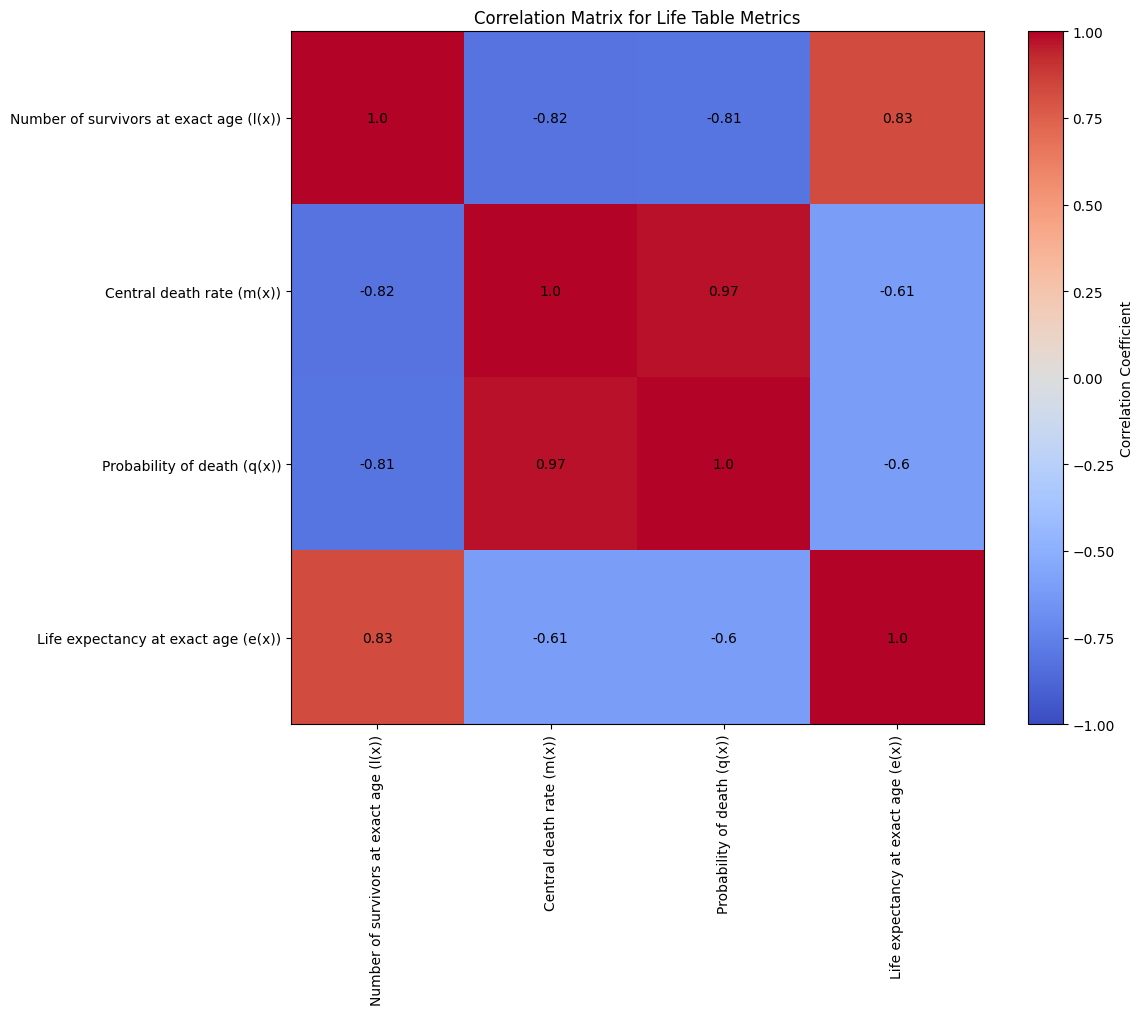

In [ ]:
import numpy as np

# Define the correlation matrix and labels
correlation_values = correlation_matrix_renamed.values
labels = correlation_matrix_renamed.columns.tolist()

# Plot the correlation matrix using imshow
plt.figure(figsize=(12, 10))
plt.imshow(correlation_values, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Matrix for Life Table Metrics')

# Set ticks and labels
positions = np.arange(len(labels))
plt.xticks(positions, labels, rotation=90)
plt.yticks(positions, labels)

# Annotate each cell with the numeric value
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, round(correlation_values[i, j], 2),
                 ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


Simplified Pie Chart for Male Birth Rate

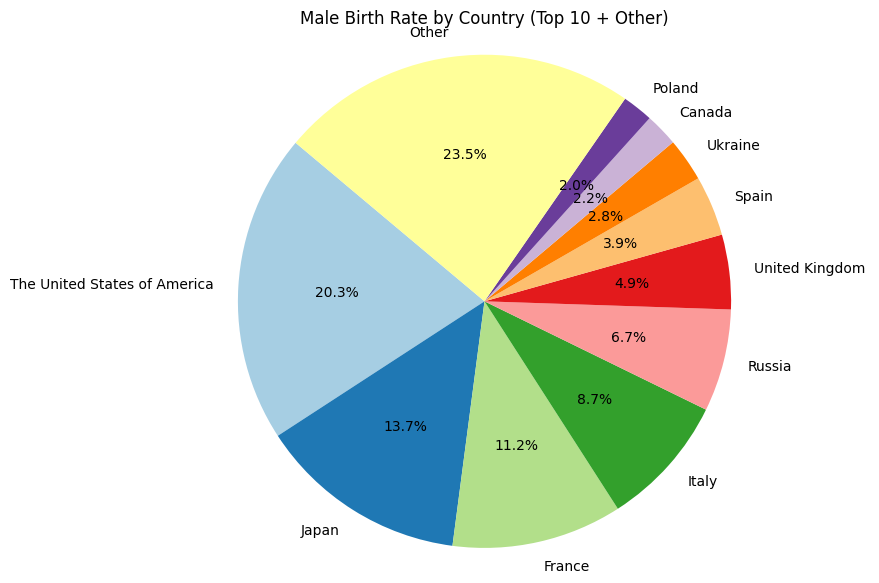

In [ ]:
# Aggregate and sort the male birth rate for each country
aggregated_birth_rate_male = birth_rate.groupby('Countries')['Male'].sum().reset_index()
aggregated_birth_rate_male = aggregated_birth_rate_male.sort_values(by='Male', ascending=False)

# Show only the top N countries and group the rest into 'Other' for Pie Chart
top_countries_male = aggregated_birth_rate_male.iloc[:N].copy()
other_countries_total_male = aggregated_birth_rate_male.iloc[N:]['Male'].sum()
top_countries_male.loc[N] = ['Other', other_countries_total_male]

# Plot the simplified pie chart for male birth rate
plt.figure(figsize=(7, 7))
plt.pie(top_countries_male['Male'], labels=top_countries_male['Countries'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')
plt.title('Male Birth Rate by Country (Top {} + Other)'.format(N))
plt.show()


Simplified Pie Chart for Female Birth Rate

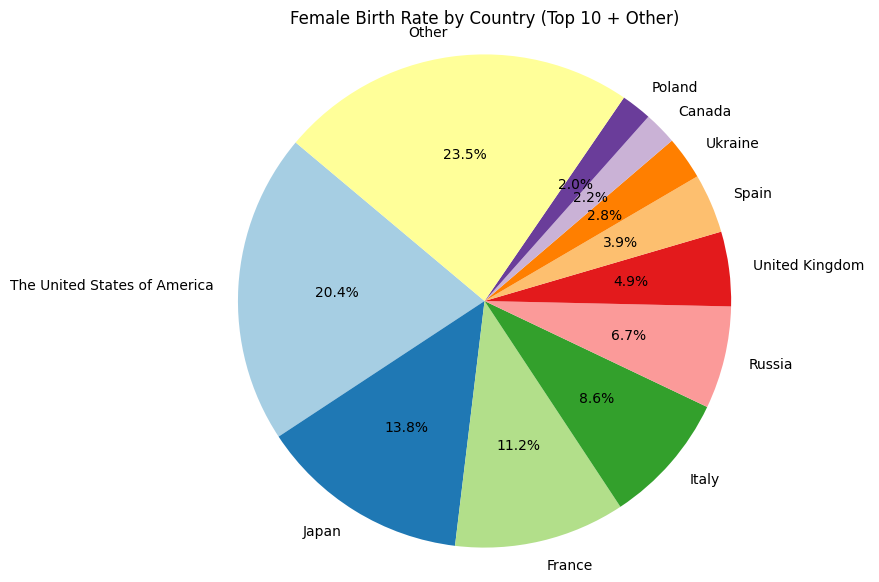

In [ ]:
# Aggregate and sort the female birth rate for each country
aggregated_birth_rate_female = birth_rate.groupby('Countries')['Female'].sum().reset_index()
aggregated_birth_rate_female = aggregated_birth_rate_female.sort_values(by='Female', ascending=False)

# Show only the top N countries and group the rest into 'Other' for Pie Chart
top_countries_female = aggregated_birth_rate_female.iloc[:N].copy()
other_countries_total_female = aggregated_birth_rate_female.iloc[N:]['Female'].sum()
top_countries_female.loc[N] = ['Other', other_countries_total_female]

# Plot the simplified pie chart for female birth rate
plt.figure(figsize=(7, 7))
plt.pie(top_countries_female['Female'], labels=top_countries_female['Countries'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')
plt.title('Female Birth Rate by Country (Top {} + Other)'.format(N))
plt.show()

Annotated Bar Chart for Total Birth Rate by Country

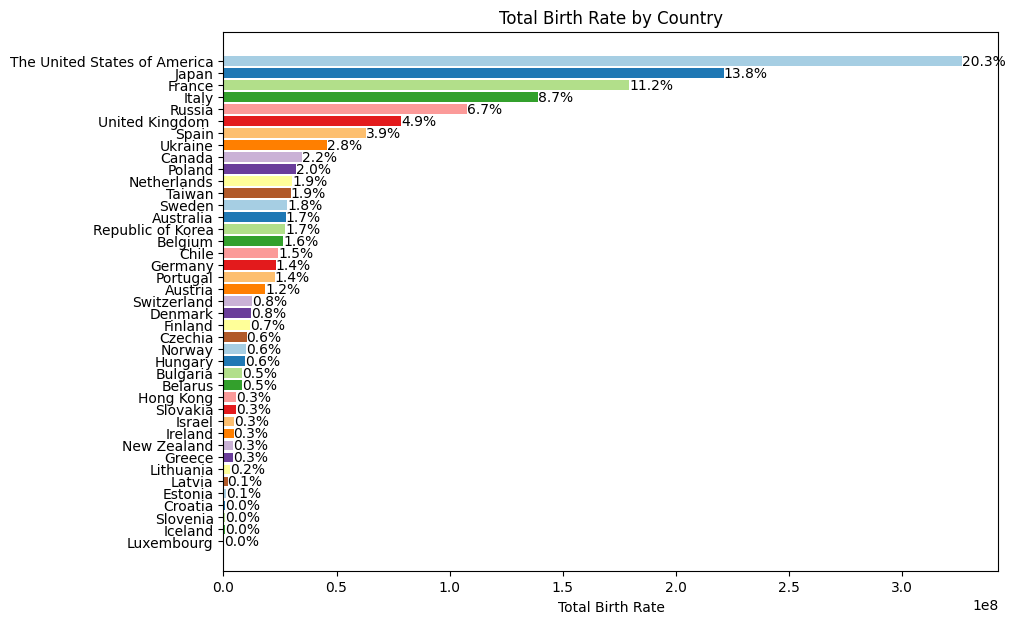

In [ ]:
# Aggregate and sort the total birth rate for each country
aggregated_birth_rate = birth_rate.groupby('Countries')['Total'].sum().reset_index()
aggregated_birth_rate = aggregated_birth_rate.sort_values(by='Total', ascending=False)

# Calculate the total birth rate
total_birth_rate = aggregated_birth_rate['Total'].sum()

# Plot the bar chart for total birth rate
plt.figure(figsize=(10, 7))
bars = plt.barh(aggregated_birth_rate['Countries'], aggregated_birth_rate['Total'], color=plt.cm.Paired.colors)
plt.xlabel('Total Birth Rate')
plt.title('Total Birth Rate by Country')
plt.gca().invert_yaxis()  # To display the highest bar at the top

# Annotate bars with the percentage of the total birth rate
for bar in bars:
    width = bar.get_width()
    label_x_pos = width
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{(width/total_birth_rate)*100:.1f}%', va='center')

plt.show()
